# **Forecasts for Product Demand**
## *Make Accurate Forecasts for Thousands of Different Products*
<br>

## **Time Series Forecasting Template**

* ### 1. Business understanding and performance metrics definition
* ### 2. Data ingestion
* ### 3. Data exploration and understanding
* ### 4. Data pre-processing and feature engineering
* ### 5. Modeling building and selection
* ### 6. Model deployment
* ### 7. Forecasting solution acceptance
<br>

# 1. Business understanding and performance metrics definition

### **Context**

The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. If forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved, it would be beneficial to the company in multiple ways.

### **Content**

Historical Product Demand.csv - CSV data file containing product demand for encoded product id's

### **Acknowledgements**
This dataset is all real-life data and products/warehouse and category information encoded.

### **Problem**
Is it possible to make forecasts for thousands of products (some of them are highly variable in terms of monthly demand) for the the month after next?

**Define the following forecasting aspects:**

    a) The inputs and outputs of your forecasting model
    b) Granularity level of your forecasting model
    c) Horizon of your forecasting model
    d) The endogenous and exogenous features of your forecasting model
    e) The structured or unstructured features of your forecasting model
    f) The univariate or multivariate nature of your forecasting model (The term univariate time series refers to one that consists of single observations recorded sequentially over equal time increments)
    g) Single-step or multi-step structure of your forecasting model
    h) Contiguous or noncontiguous time series values of your forecasting model

In [9]:
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# 2. Data ingestion

In [60]:
df = pd.read_csv('Historical Product Demand.csv')

# 3. Data exploration and understanding

In [61]:
df.head()

Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500

In [13]:
# Dimension
print("Rows: {} Columns: {}".format(df.shape[0], df.shape[1]))

Rows: 1048575 Columns: 5


In [14]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [62]:
# Change Date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

In [63]:
df['Order_Demand'].unique()

array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

In [64]:
# Change Order Demand format
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")

df['Order_Demand']=df['Order_Demand'].str.strip()
df['Order_Demand']=df['Order_Demand'].str.strip()

# Since the "()" has been removed , we could change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

In [18]:
df['Order_Demand'].sum()

5145333321

In [19]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [65]:
# Missing Data
#Lets check where these nulls are.
print(df.isna().sum())
print("")
print ('% of Null Dates in the Dataset: ',df.isnull().sum()[3]/df.shape[0]*100)
#There are missing values in Dates.

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

% of Null Dates in the Dataset:  1.0718355863910547


In [66]:
# Drop na's.

# Since the number of missing values are about 1%, I am taking an 'executive decision' of removing them. ;)

df.dropna(axis=0, inplace=True) # Remove all rows with na's.
df.reset_index(drop=True)

Product_Code Warehouse Product_Category       Date  Order_Demand
0        Product_0993    Whse_J     Category_028 2012-07-27           100
1        Product_0979    Whse_J     Category_028 2012-01-19           500
2        Product_0979    Whse_J     Category_028 2012-02-03           500
3        Product_0979    Whse_J     Category_028 2012-02-09           500
4        Product_0979    Whse_J     Category_028 2012-03-02           500
5        Product_0979    Whse_J     Category_028 2012-04-19           500
6        Product_0979    Whse_J     Category_028 2012-06-05           500
7        Product_0979    Whse_J     Category_028 2012-06-27           500
8        Product_0979    Whse_J     Category_028 2012-07-23           500
9        Product_0979    Whse_J     Category_028 2012-08-29           500
10       Product_0979    Whse_J     Category_028 2012-08-29           500
11       Product_0979    Whse_J     Category_028 2012-09-18           500
12       Product_0979    Whse_J     Category_028 2012-10-11           500
13       Product_0979    Whse_J     Category_028 2012-11-01           500
14       Product_0979    Whse_J     Category_028 2012-11-29           500
15       Product_0979    Whse_J     Category_028 2012-12-26           500
16       Product_1159    Whse_J     Category_006 2012-01-06         50000
17       Product_1159    Whse_J     Category_006 2012-01-18        100000
18       Product_1159    Whse_J     Category_006 2012-02-02         50000
19       Product_1159    Whse_J     Category_006 2012-02-22         50000
20       Product_1159    Whse_J     Category_006 2012-03-02         50000
21       Product_1159    Whse_J     Category_006 2012-03-09         50000
22       Product_1159    Whse_J     Category_006 2012-03-23         50000
23       Product_1159    Whse_J     Category_006 2012-04-06         50000
24       Product_1159    Whse_J     Category_006 2012-04-16         50000
25       Product_1159    Whse_J     Category_006 2012-05-07         50000
26       Product_1159    Whse_J     Category_006 2012-04-17         50000
27       Product_1159    Whse_J     Category_006 2012-05-30         50000
28       Product_1159    Whse_J     Category_006 2012-06-20         50000
29       Product_1159    Whse_J     Category_006 2012-06-29         50000
...               ...       ...              ...        ...           ...
1037306  Product_0219    Whse_J     Category_007 2016-05-20            25
1037307  Product_0188    Whse_J     Category_007 2016-05-25            10
1037308  Product_0219    Whse_J     Category_007 2016-07-07            24
1037309  Product_0179    Whse_J     Category_007 2016-08-17            30
1037310  Product_0185    Whse_J     Category_007 2016-08-17            30
1037311  Product_0188    Whse_J     Category_007 2016-08-17            30
1037312  Product_0215    Whse_J     Category_007 2016-10-06             6
1037313  Product_0217    Whse_J     Category_007 2016-10-06           180
1037314  Product_0220    Whse_J     Category_007 2016-10-06            26
1037315  Product_0221    Whse_J     Category_007 2016-10-06            98
1037316  Product_0224    Whse_J     Category_007 2016-10-06           116
1037317  Product_0196    Whse_J     Category_007 2016-11-02           480
1037318  Product_0181    Whse_J     Category_007 2016-11-11            35
1037319  Product_0215    Whse_J     Category_007 2016-11-11            29
1037320  Product_0332    Whse_J     Category_021 2016-07-07             1
1037321  Product_0287    Whse_J     Category_021 2016-08-17            40
1037322  Product_0332    Whse_J     Category_021 2016-08-17             4
1037323  Product_0287    Whse_J     Category_021 2016-10-12            90
1037324  Product_0336    Whse_J     Category_021 2016-10-12             1
1037325  Product_0287    Whse_J     Category_021 2016-11-11            30
1037326  Product_0332    Whse_J     Category_021 2016-11-11             4
1037327  Product_0308    Whse_J     Category_024 2016-11-02             8
1037328  Prod

In [67]:
#Totals

print("Total Product Categories: {} ".format(len(df['Product_Category'].unique())))
print("Total Warehouses: {} ".format(len(df['Warehouse'].unique())))
print("Total Products: {} ".format(len(df['Product_Code'].unique())))

Total Product Categories: 33 
Total Warehouses: 4 
Total Products: 2160 


In [68]:
#Time Series Period

dates = [pd.to_datetime(date) for date in df['Date']]
dates.sort()
print("Start Date: {}".format(dates[0]))
print("Final Date: {}".format(dates[-1]))


Start Date: 2011-01-08 00:00:00
Final Date: 2017-01-09 00:00:00


In [24]:
df.describe(include='all')

Product_Code Warehouse Product_Category                 Date  Order_Demand
count        1037336   1037336          1037336              1037336  1.037336e+06
unique          2160         4               33                 1729           NaN
top     Product_1359    Whse_J     Category_019  2013-09-27 00:00:00           NaN
freq           16936    764447           470266                 2075           NaN
first            NaN       NaN              NaN  2011-01-08 00:00:00           NaN
last             NaN       NaN              NaN  2017-01-09 00:00:00           NaN
mean             NaN       NaN              NaN                  NaN  4.949384e+03
std              NaN       NaN              NaN                  NaN  2.907344e+04
min              NaN       NaN              NaN                  NaN  0.000000e+00
25%              NaN       NaN              NaN                  NaN  2.000000e+01
50%              NaN       NaN              NaN                  NaN  3.000000e+02
75%              NaN       NaN              NaN                  NaN  2.000000e+03
max              NaN       NaN              NaN                  NaN  4.000000e+06

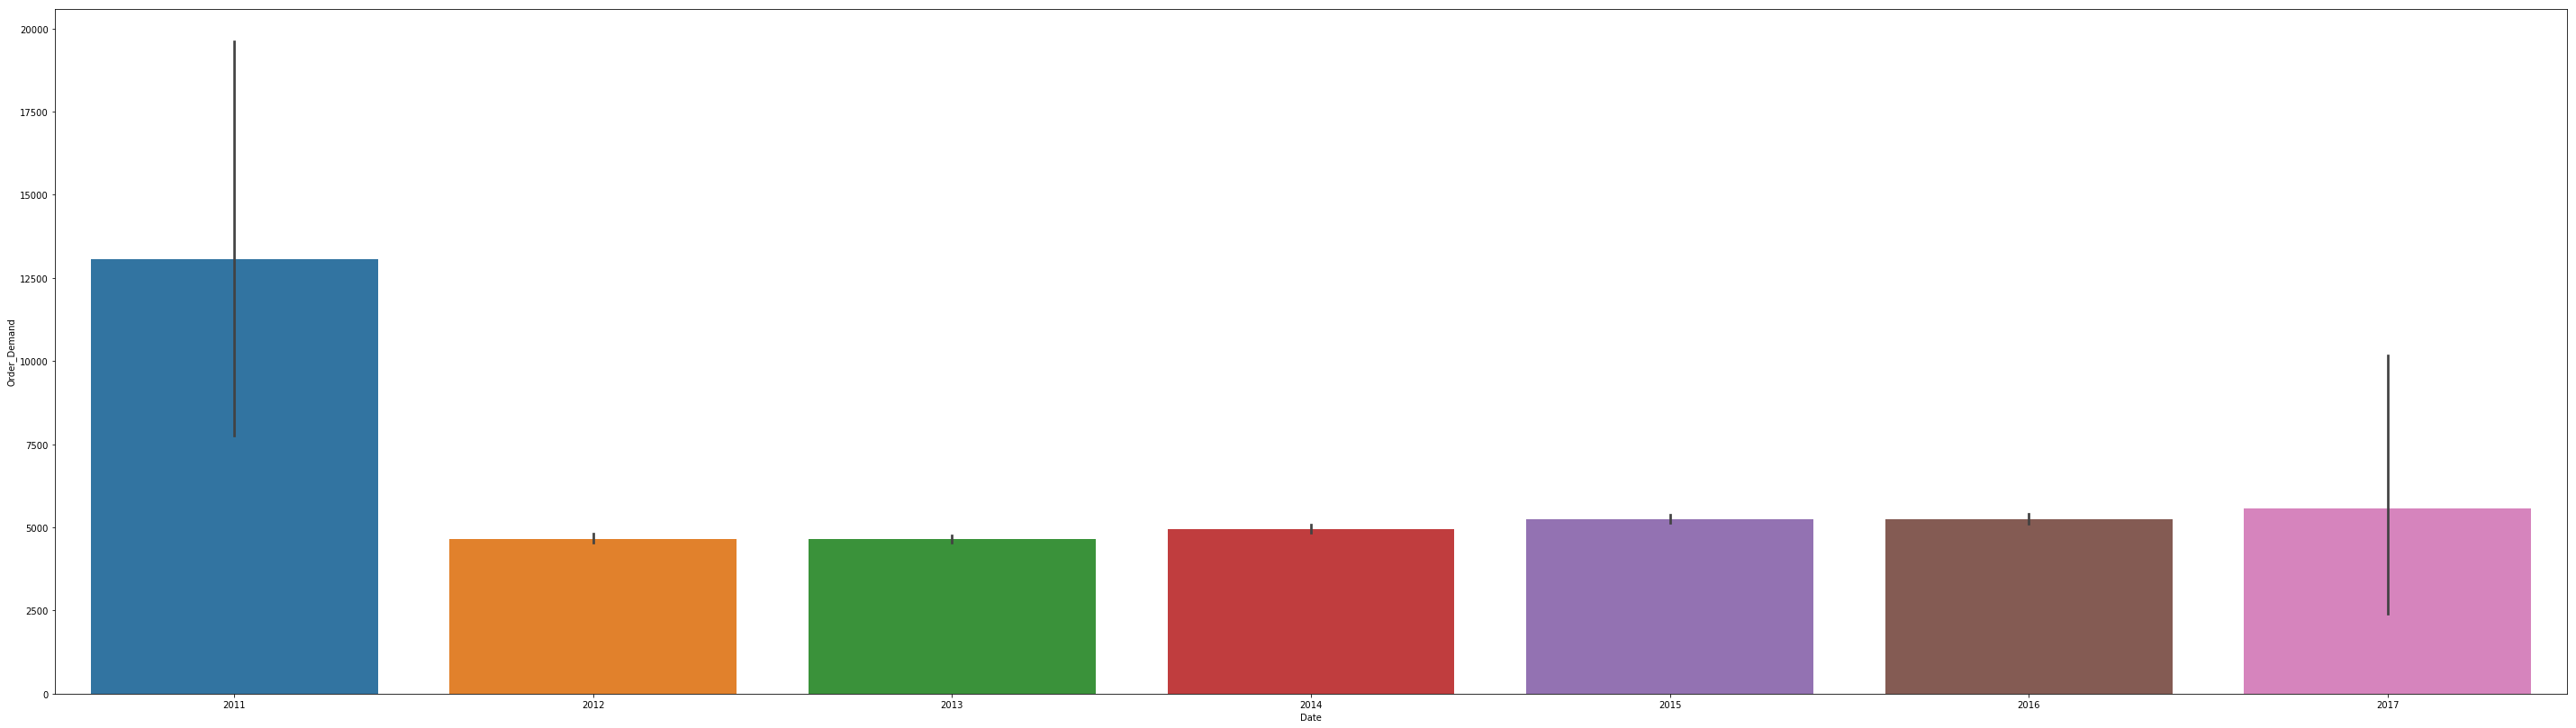

In [25]:
# Histogram / year

rcParams['figure.figsize'] = 50,14
sns.barplot(x=pd.DatetimeIndex(df['Date']).year, y=df['Order_Demand'])

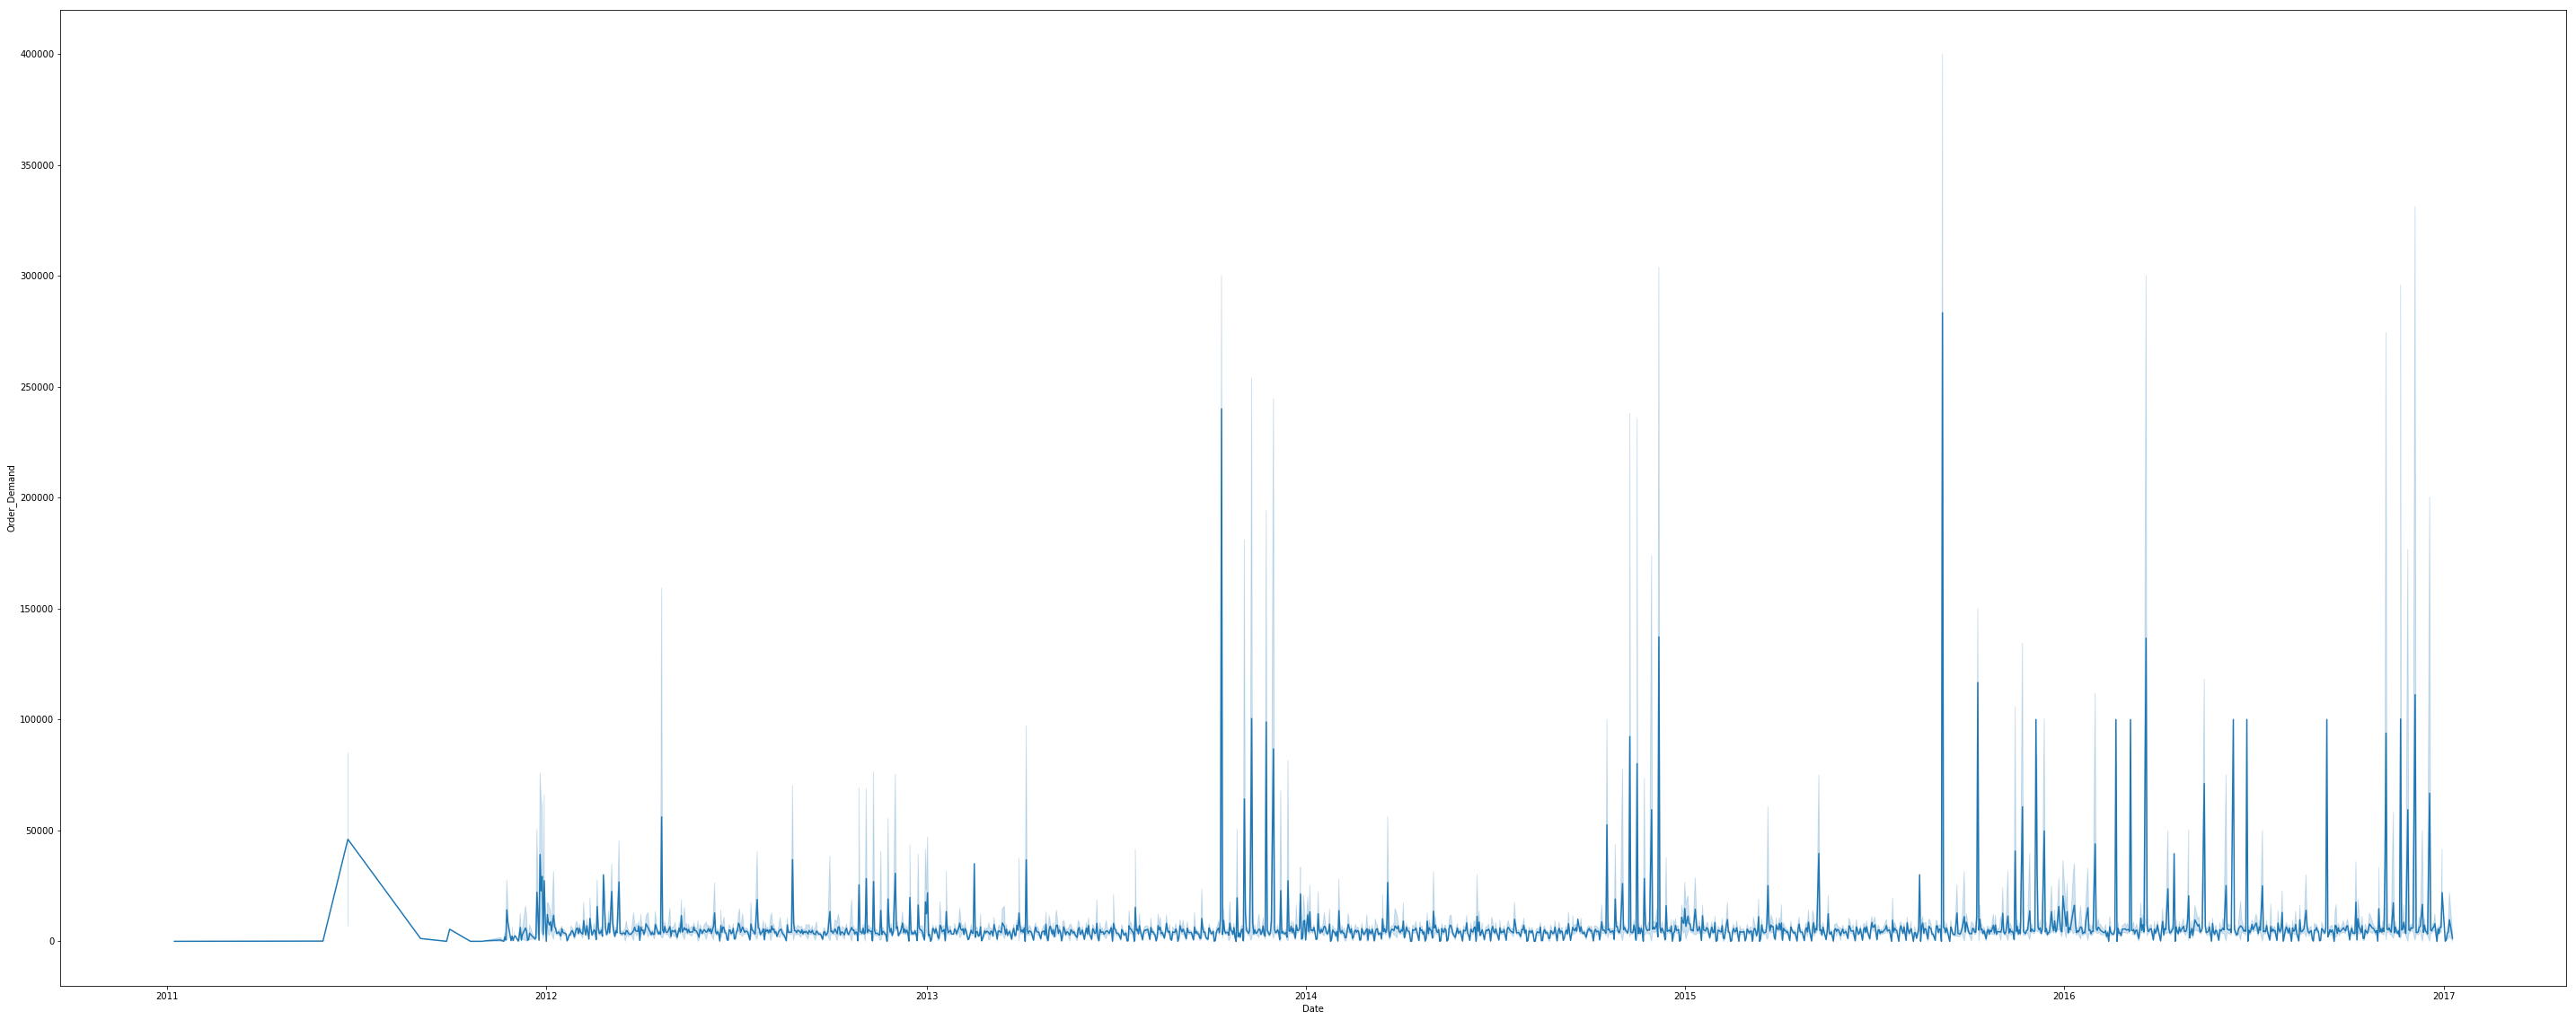

In [26]:
#Line plot / day
rcParams['figure.figsize'] = 50,20
sns.lineplot(x=df['Date'], y=df['Order_Demand'])


In [27]:
#Analizing the 2011 year
df_2011 = df[(df['Date']>='2011-01-01') & (df['Date']<='2012-01-01')].sort_values('Date', ascending=True).copy()

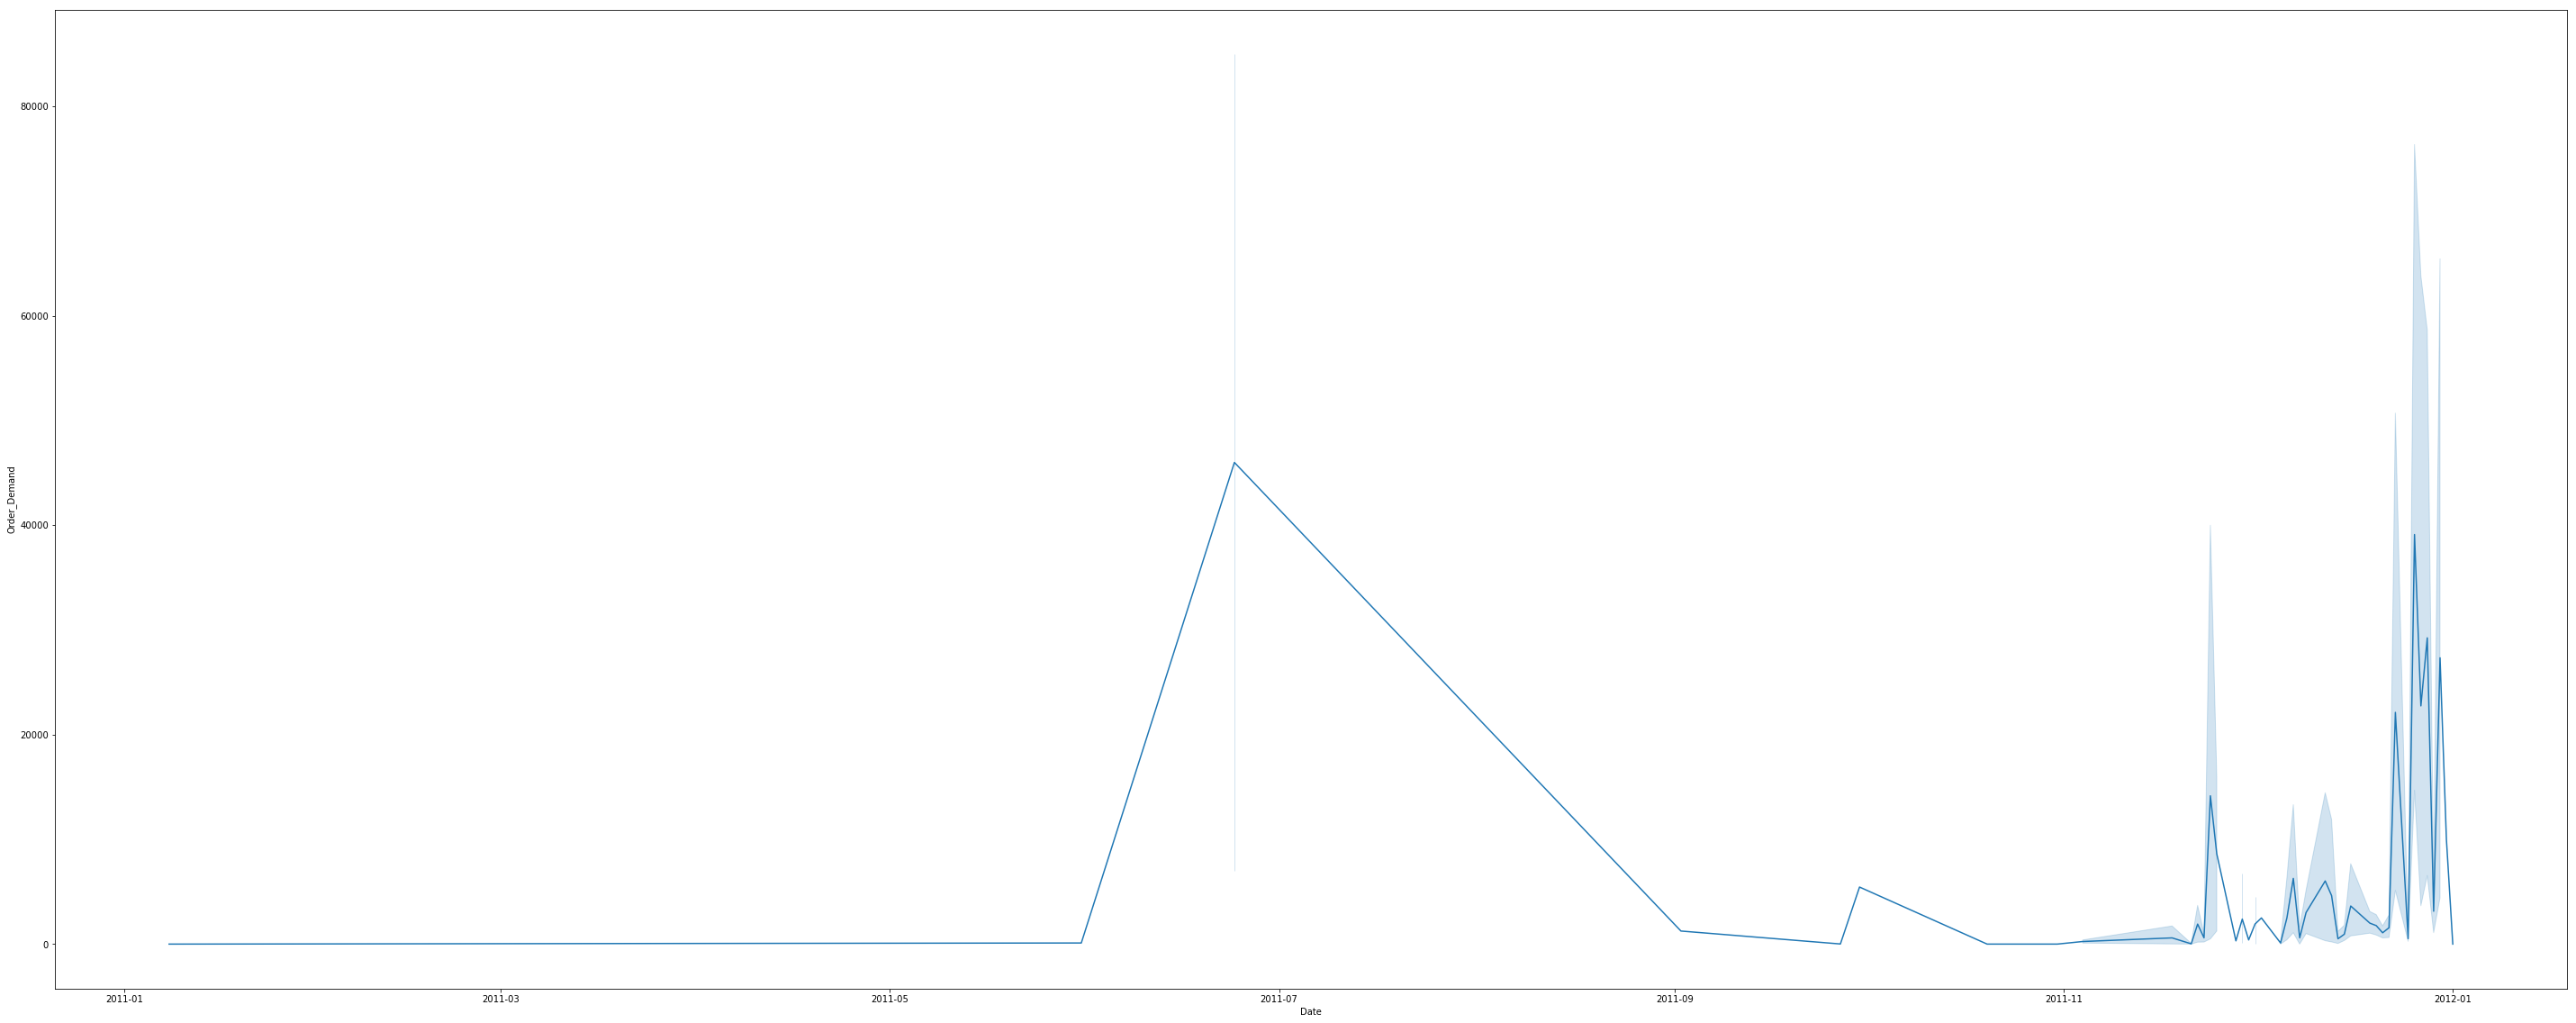

In [28]:
sns.lineplot(x=df_2011['Date'], y=df_2011['Order_Demand'])

In [29]:
#Analizing the 2017 year
df_2017 = df[(df['Date']>='2016-12-31')].sort_values('Date', ascending=True).copy()

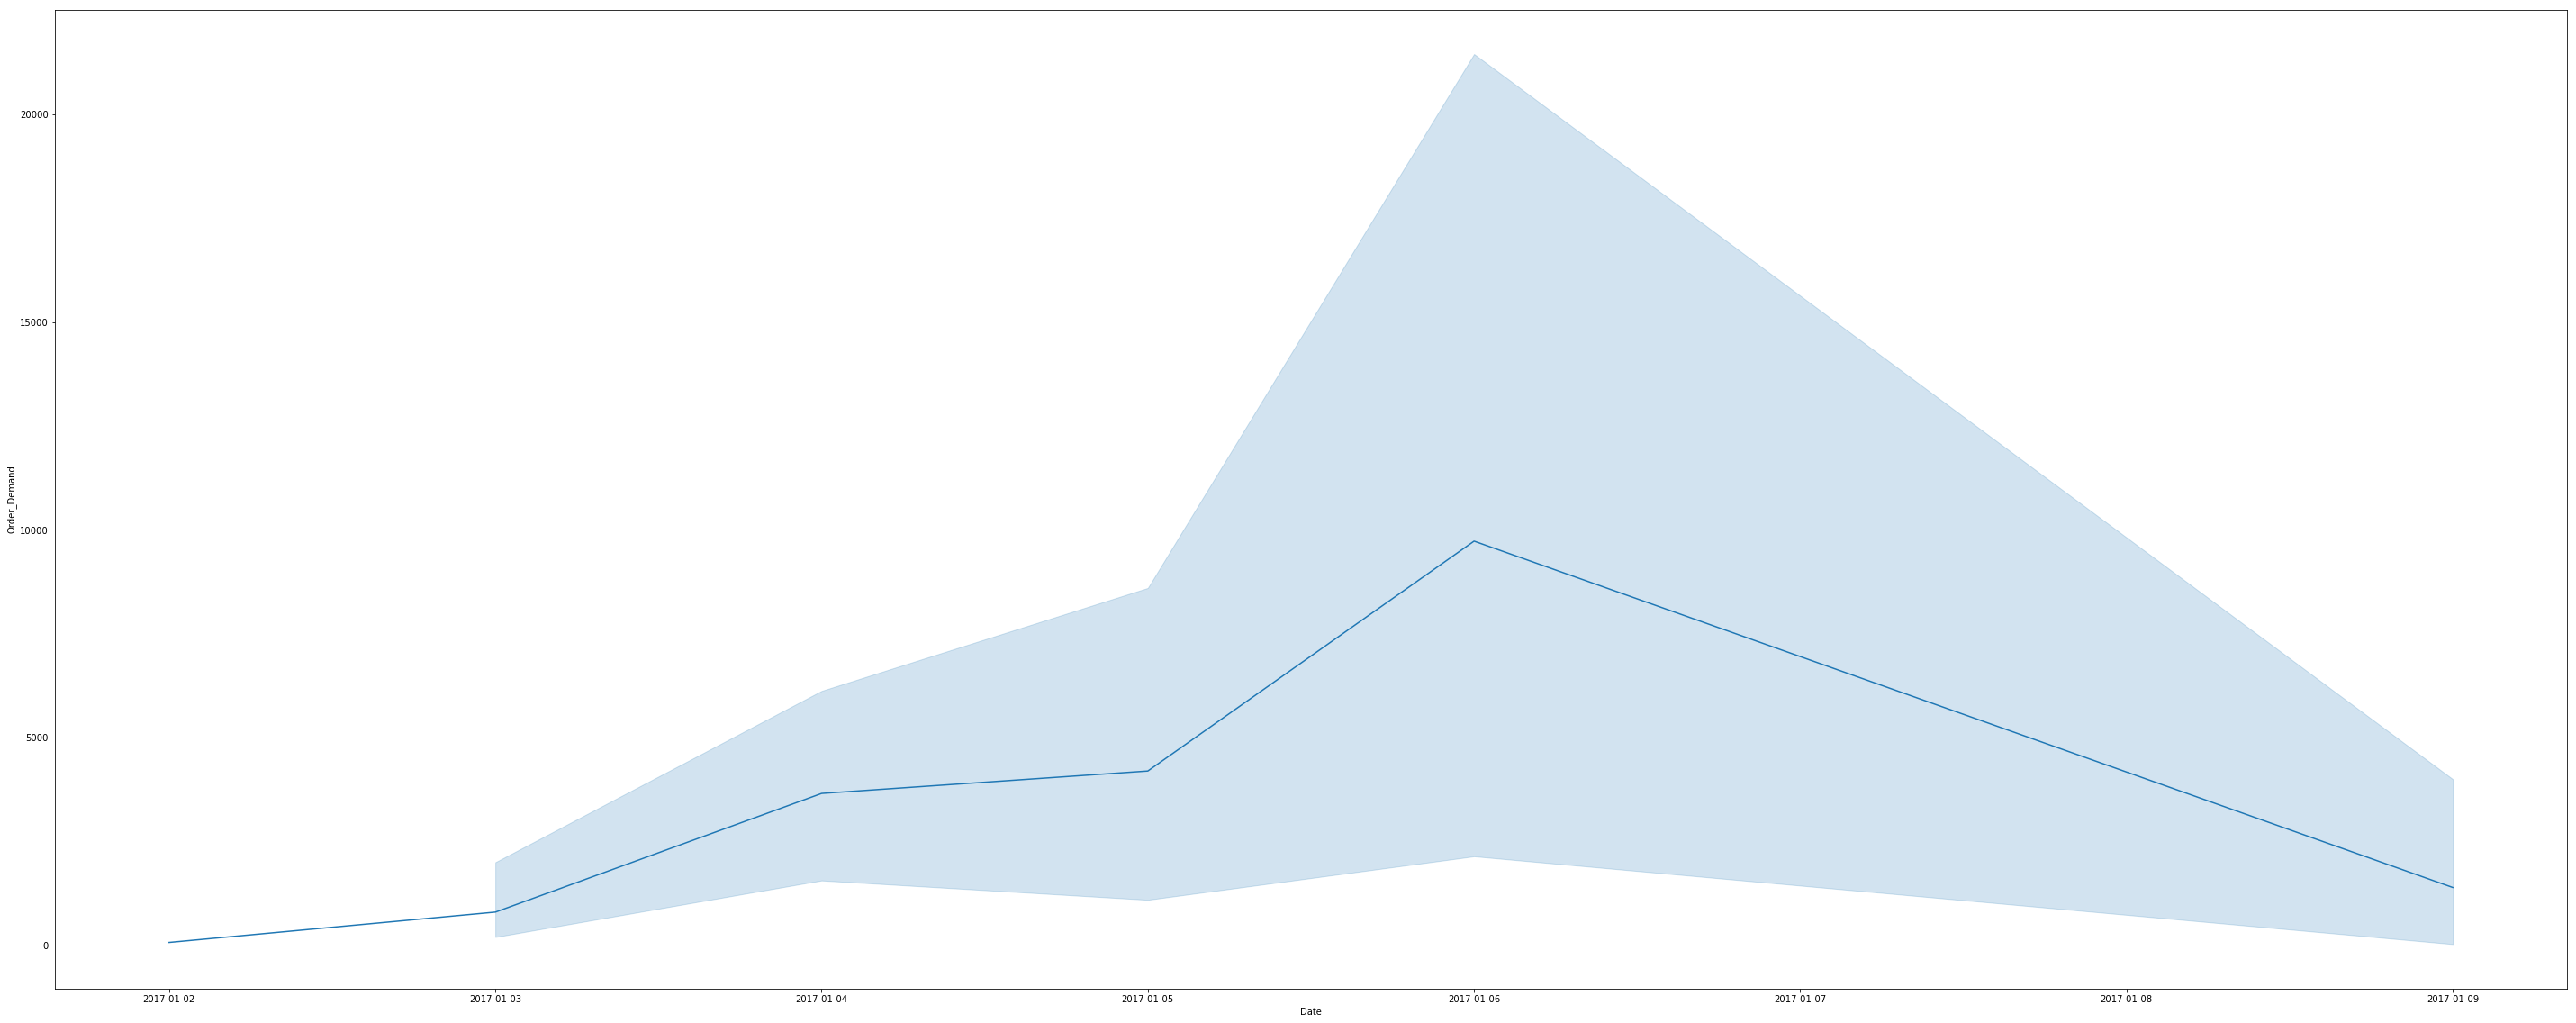

In [30]:
sns.lineplot(x=df_2017['Date'], y=df_2017['Order_Demand'])

In [31]:
#Create Year column
df['Year'] = df['Date'].dt.year

In [32]:
df_year=pd.DataFrame(df.groupby('Year')['Order_Demand'].sum())
df_year['Orders']=df['Year'].value_counts()

In [33]:
df_year

Order_Demand  Orders
Year                      
2011       8363894     640
2012     949259991  203635
2013    1014087922  218298
2014    1071178367  216404
2015    1099398391  209661
2016     991590399  188645
2017        294967      53

In [69]:
#Lets start with 2012 and cap it 2016 december. Since the dates before 2012 have a lot of missing values - inspected and checked using basic time series plot.

df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)


In [35]:
dates1 = [pd.to_datetime(date) for date in df['Date']]
dates1.sort()
print("Start Date: {}".format(dates1[0]))
print("Final Date: {}".format(dates1[-1]))
n_days = dates1[-1] - dates1[0]
print("N Days: {}".format(n_days))

Start Date: 2012-01-01 00:00:00
Final Date: 2016-12-30 00:00:00
N Days: 1825 days 00:00:00


In [36]:
df.head()

Product_Code Warehouse Product_Category       Date  Order_Demand  Year
130870  Product_2166    Whse_S     Category_024 2012-01-01             2  2012
196928  Product_0614    Whse_S     Category_001 2012-01-02             3  2012
200087  Product_1281    Whse_S     Category_019 2012-01-02         14000  2012
200086  Product_1355    Whse_S     Category_019 2012-01-02          5000  2012
77313   Product_2169    Whse_S     Category_024 2012-01-02            55  2012

### Warehouse Analysis

In [37]:
#Warehouse shipping by orders.
df_warehouse  = pd.DataFrame()
df_warehouse['Orders']=df['Warehouse'].value_counts()
df_warehouse['Demand']=df.groupby('Warehouse')['Order_Demand'].sum()
df_warehouse['Demand/Order'] = df_warehouse['Demand'] / df_warehouse['Orders']
df_warehouse['Demand/Order']=df_warehouse['Demand/Order'].round(decimals=2)

In [38]:
df_warehouse.sort_values('Orders', ascending = False)

Orders      Demand  Demand/Order
Whse_J  764215  3362742530       4400.26
Whse_A  142197   147646550       1038.32
Whse_S   88024  1033121811      11736.82
Whse_C   42207   582004179      13789.28

In [39]:
#gráfico

In [40]:
df_warehouse2  = df[['Year', 'Warehouse', 'Order_Demand']].groupby(['Year', 'Warehouse'], as_index=False).count()

In [41]:
df_warehouse2 = df_warehouse2.pivot(index='Year', columns='Warehouse', values='Order_Demand')

In [42]:
df_warehouse2['Total'] = df_warehouse2.sum(axis=1)

In [43]:
df_warehouse2

Warehouse  Whse_A  Whse_C  Whse_J  Whse_S   Total
Year                                             
2012        28218    6889  150013   18515  203635
2013        33607    7934  156251   20506  218298
2014        28124    8187  157786   22307  216404
2015        26686    8963  153937   20075  209661
2016        25562   10234  146228    6621  188645

In [34]:
#gráfico

### Warehouse Time Series Analysis 

In [44]:
df_warehouse3 = df[['Warehouse', 'Date', 'Order_Demand']].groupby(['Date', 'Warehouse'], as_index=False).sum()

In [45]:
df_warehouse3.head()

Date Warehouse  Order_Demand
0 2012-01-01    Whse_S             2
1 2012-01-02    Whse_A           500
2 2012-01-02    Whse_S        679777
3 2012-01-03    Whse_A        152892
4 2012-01-03    Whse_C        275137

In [46]:
df_Whse_S = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_S']
df_Whse_A = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_A']
df_Whse_C = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_C']
df_Whse_J = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_J']

In [47]:
# plot line with x-axis, y-axis and title
def plotline(x):
    plt.plot(x.Date, x.Order_Demand)
    #plt.title(x.Warehouse[0])
    plt.xlabel("days")
    plt.ylabel("Order Demand")
    plt.show()

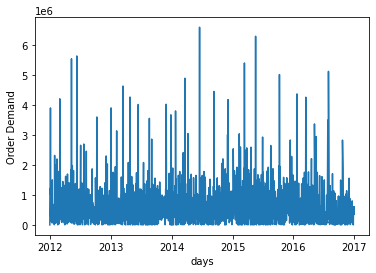

In [39]:
plotline(df_Whse_S)

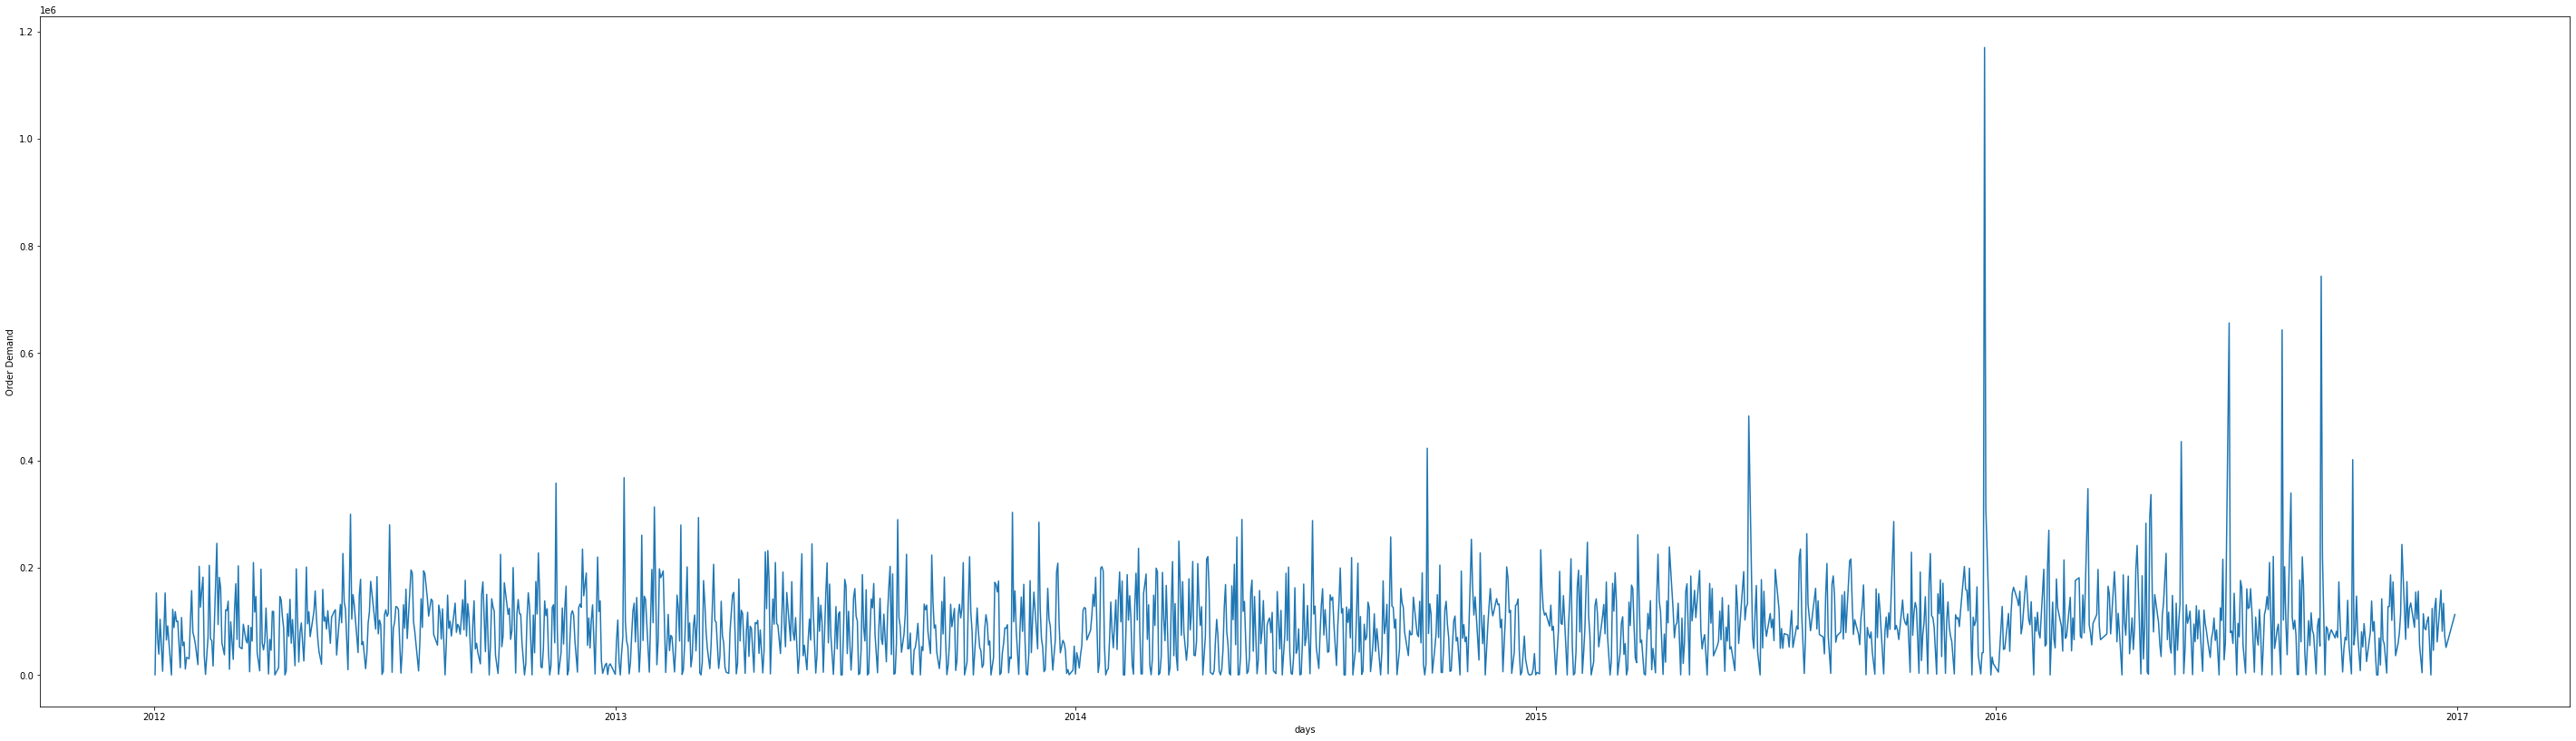

In [41]:
plotline(df_Whse_A)

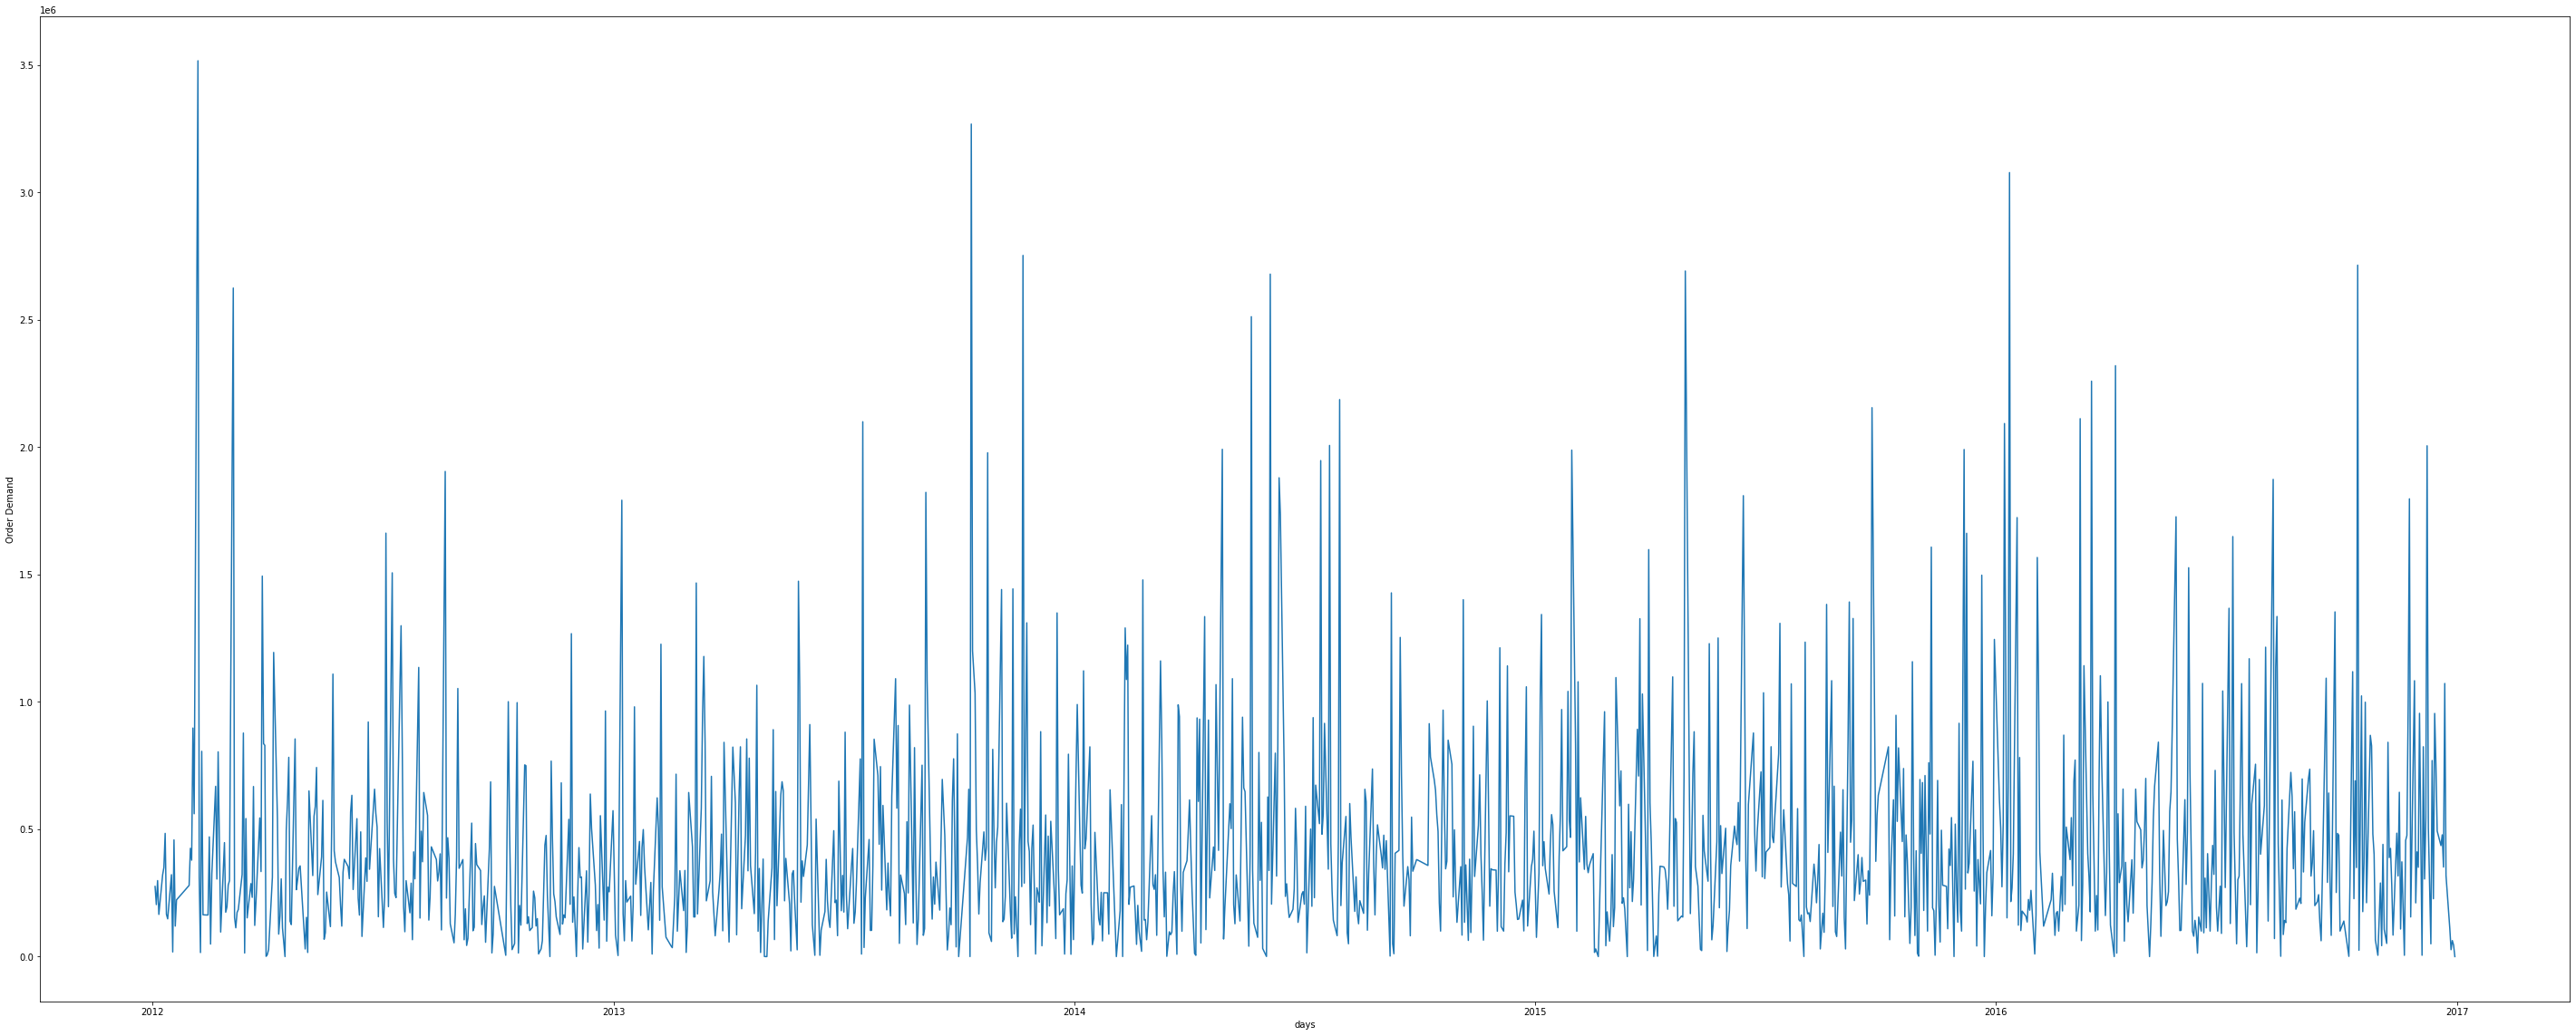

In [43]:
plotline(df_Whse_C)

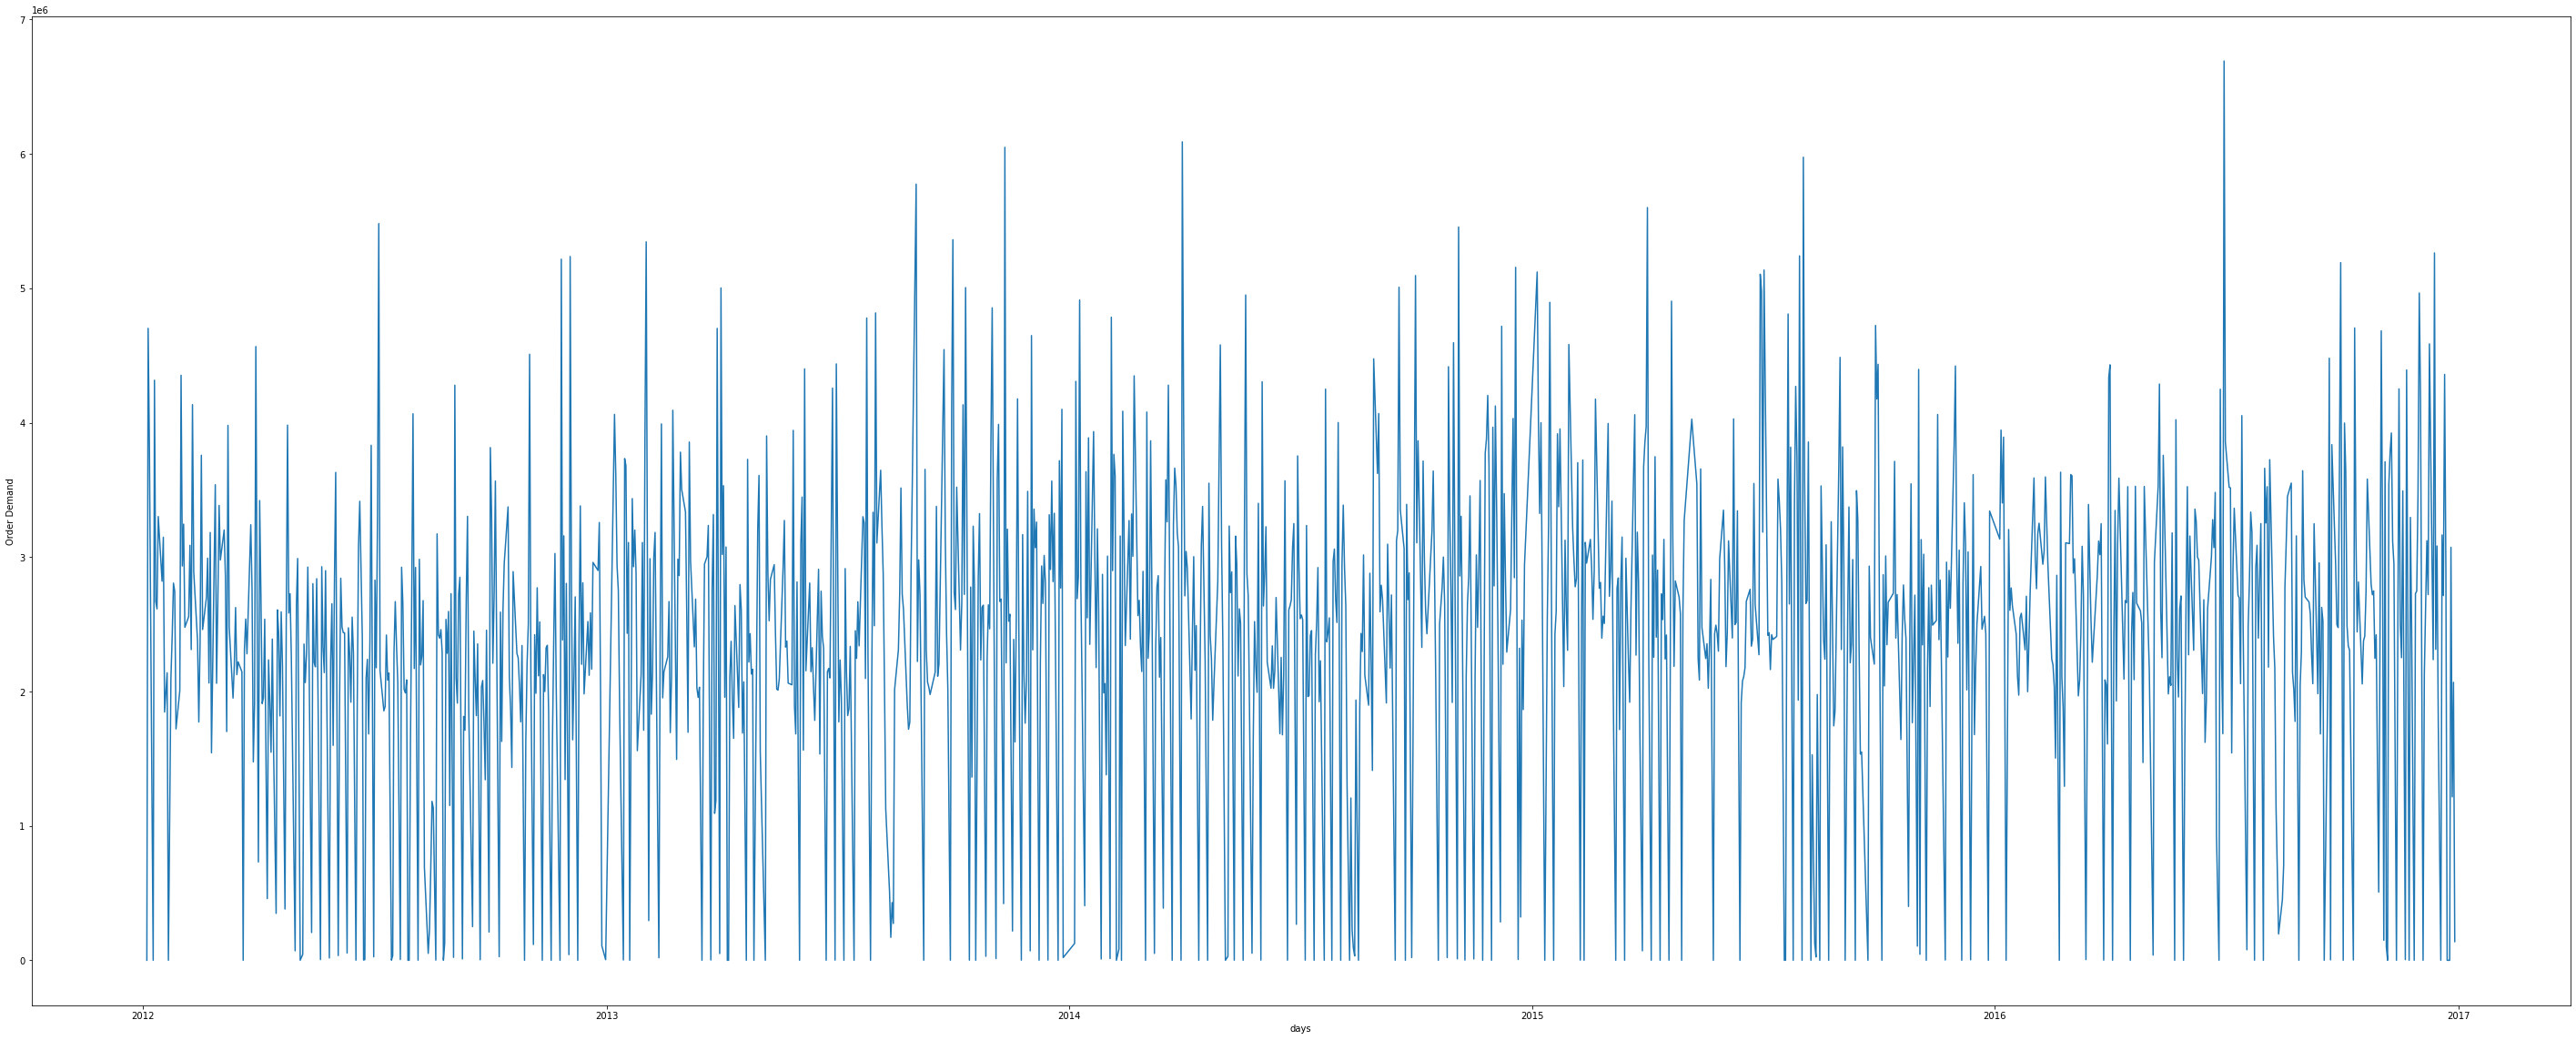

In [44]:
plotline(df_Whse_J)

In [40]:
df_warehouse4 = pd.pivot_table(df_warehouse3, index='Date', columns='Warehouse', values='Order_Demand', fill_value=0)

In [41]:
df_warehouse4.head()

Warehouse   Whse_A  Whse_C   Whse_J   Whse_S
Date                                        
2012-01-01       0       0        0        2
2012-01-02     500       0        0   679777
2012-01-03  152892  275137        0  1217228
2012-01-04   69163  204000      120  1022578
2012-01-05   38834  298318  4701940  3902682

In [42]:
df_warehouse4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1681 entries, 2012-01-01 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Whse_A  1681 non-null   int64
 1   Whse_C  1681 non-null   int64
 2   Whse_J  1681 non-null   int64
 3   Whse_S  1681 non-null   int64
dtypes: int64(4)
memory usage: 65.7 KB


In [43]:
df_warehouse4.count(axis=0)

Warehouse
Whse_A    1681
Whse_C    1681
Whse_J    1681
Whse_S    1681
dtype: int64

In [44]:
df_warehouse4.isnull().sum()

Warehouse
Whse_A    0
Whse_C    0
Whse_J    0
Whse_S    0
dtype: int64

In [45]:
df_warehouse4.astype(bool).sum(axis=0)

Warehouse
Whse_A    1543
Whse_C    1316
Whse_J    1355
Whse_S    1552
dtype: int64

In [46]:
# Zero Demands
x = (1- (df_warehouse4.astype(bool).sum(axis=0) / df_warehouse4.count(axis=0)))*100
x

Warehouse
Whse_A     8.209399
Whse_C    21.713266
Whse_J    19.393218
Whse_S     7.674004
dtype: float64

In [47]:
df_warehouse4.head()

Warehouse   Whse_A  Whse_C   Whse_J   Whse_S
Date                                        
2012-01-01       0       0        0        2
2012-01-02     500       0        0   679777
2012-01-03  152892  275137        0  1217228
2012-01-04   69163  204000      120  1022578
2012-01-05   38834  298318  4701940  3902682

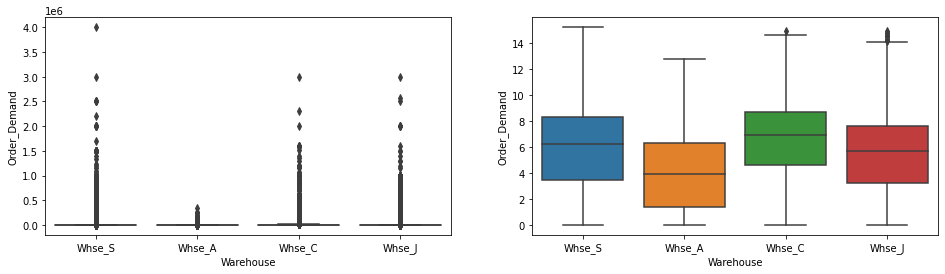

In [48]:
#Lets check the orders by warehouse.

#Checking with Boxplots
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16,4
f, axes = plt.subplots(1, 2)
#Regular Data
fig3 = sns.boxplot( df['Warehouse'],df['Order_Demand'], ax = axes[0])
#Data with Log Transformation
fig4 = sns.boxplot( df['Warehouse'], np.log1p(df['Order_Demand']),ax = axes[1])

del fig3, fig4

In [49]:
df_warehouse4.resample(rule='A').mean()

Warehouse         Whse_A         Whse_C        Whse_J         Whse_S
Date                                                                
2012-12-31  85940.828402  283500.535503  1.824143e+06  614876.807692
2013-12-31  83179.391304  318944.576812  1.926903e+06  610357.921739
2014-12-31  84548.366762  342644.802292  1.994644e+06  647441.661891
2015-12-31  91975.579268  381673.737805  2.133941e+06  744234.179878
2016-12-31  94162.897196  409261.984424  2.135006e+06  450635.563863

## Time Series Analysis

In [48]:
# import necessary Python packages
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

In [70]:
#This gives us the total orders placed on each day.

df = df.groupby('Date')['Order_Demand'].sum().reset_index().copy()
#Index the date
df = df.set_index('Date').copy()
df.index #Lets check the index


DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-08', '2012-01-09',
               '2012-01-10', '2012-01-11',
               ...
               '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1681, freq=None)

In [50]:
df.head()

Order_Demand
Date                    
2012-01-01             2
2012-01-02        680277
2012-01-03       1645257
2012-01-04       1295861
2012-01-05       8941774

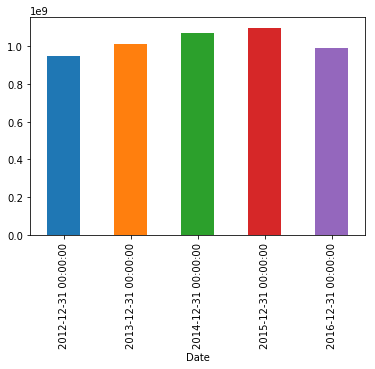

In [51]:
df['Order_Demand'].resample('A').sum().plot.bar()

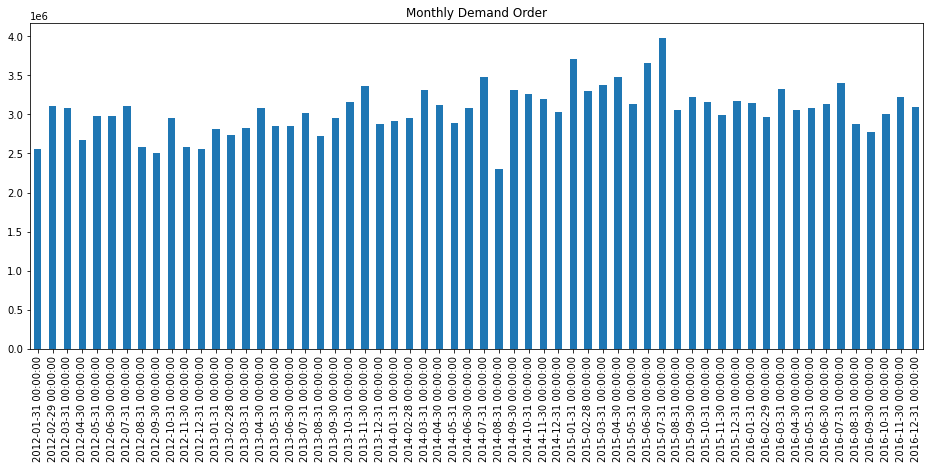

In [56]:
title = "Monthly Demand Order"
ax = df['Order_Demand'].resample('M').mean().plot.bar(figsize=(16,6), title=title)
ax.set(xlabel='');
#ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=1))
#ax.xaxis.set_major_formatter(dates.Dateformatter('%a-%B'))

## Time Series Decomposition

### Daily

In [71]:
y_d = df['Order_Demand'].resample('B').mean()

In [53]:
y_d.isna().sum()

0

In [54]:
y_d.head()

Date
2011-12-30          2.0
2012-01-02     680277.0
2012-01-03    1645257.0
2012-01-04    1295861.0
2012-01-05    8941774.0
Freq: B, Name: Order_Demand, dtype: float64

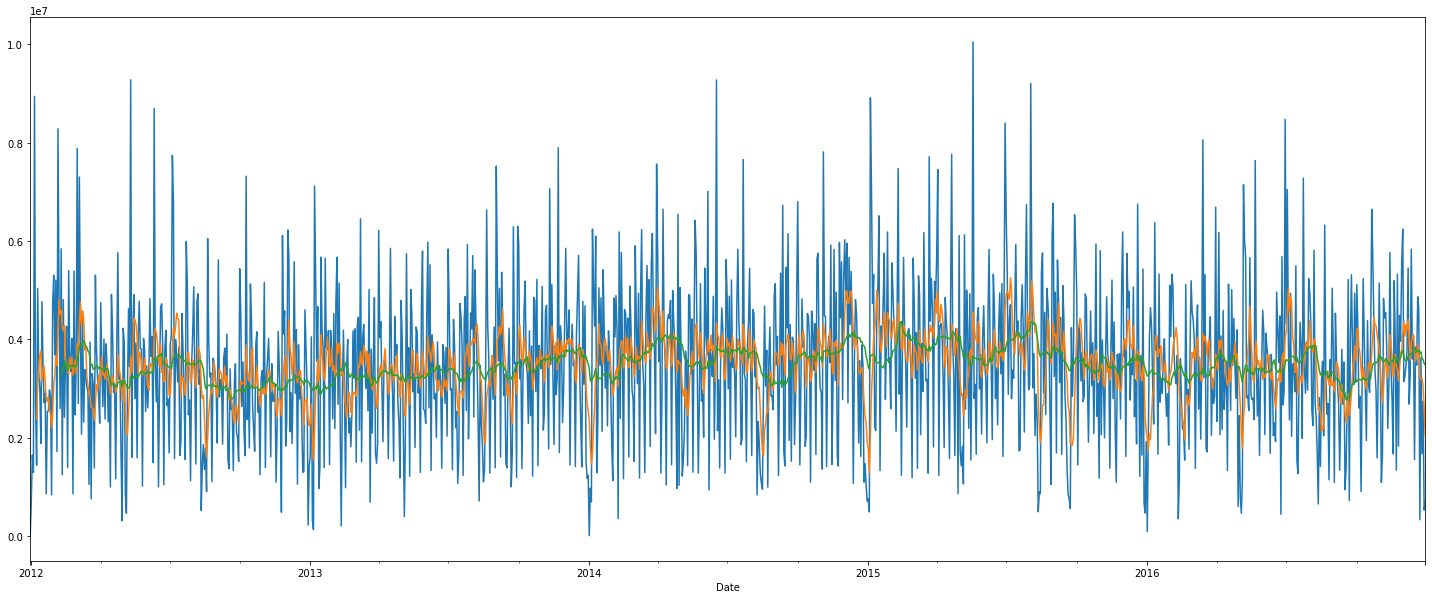

In [61]:
y_d.plot(figsize=(25,10))
y_d.rolling(window=7).mean().plot()
y_d.rolling(window=30).mean().plot()

In [147]:
#In case there are Null values, they can be imputed using bfill.
#y_d = y_d.fillna(y_d.bfill())

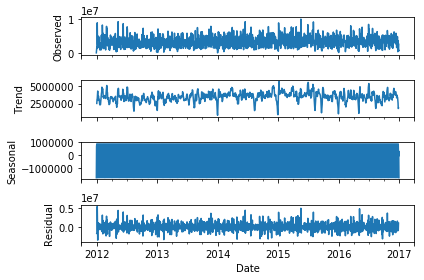

In [55]:
#Business Day Decomposition

decomposition = sm.tsa.seasonal_decompose(y_d, model = 'additive')
fig = decomposition.plot()
rcParams['figure.figsize'] = [10.0, 10.0]

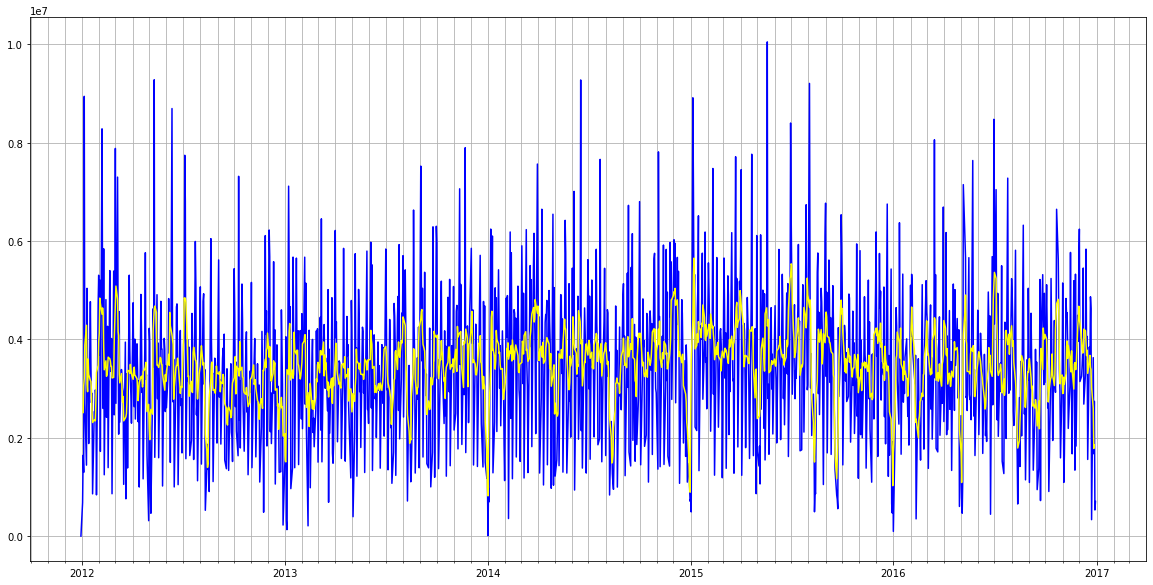

In [61]:
# Data + Trend (Daily)

matplotlib.rcParams['figure.figsize'] = [20, 10.0]
decomposition = sm.tsa.seasonal_decompose(y_d, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(y_d.index, y_d, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='yellow')

### Weekly

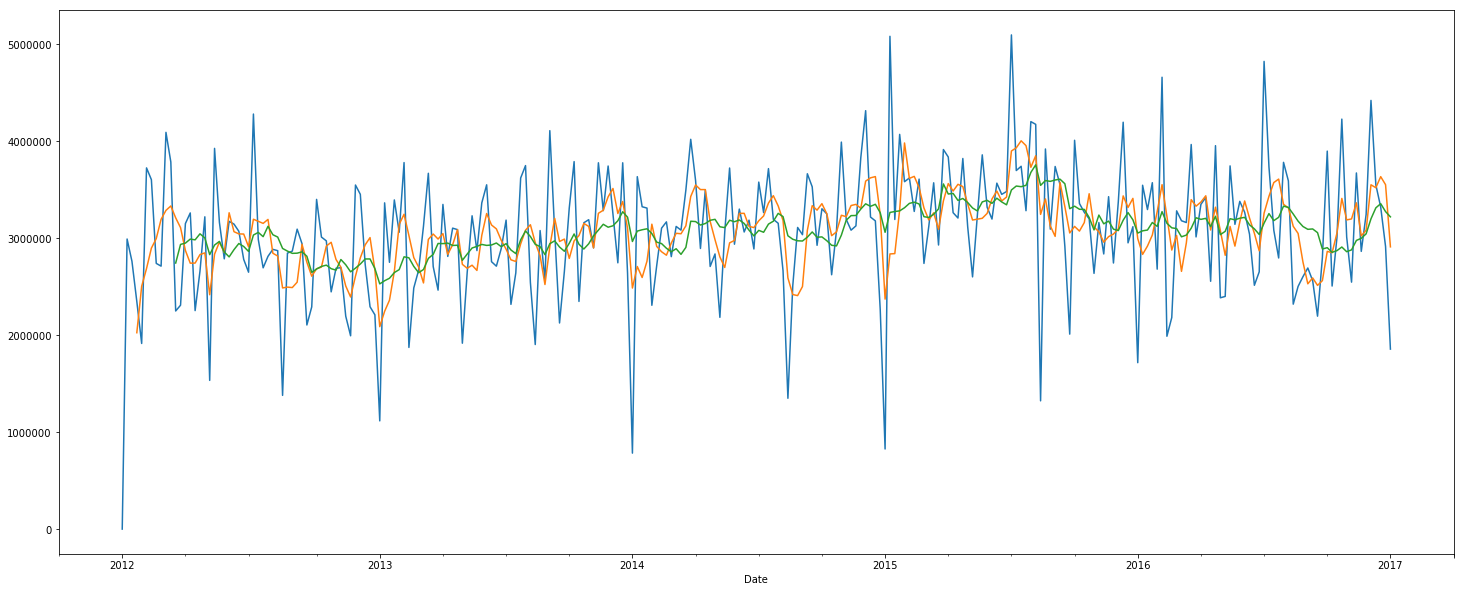

In [72]:
y_w = df['Order_Demand'].resample('W').mean()

y_w.plot(figsize=(25,10))
y_w.rolling(window=4).mean().plot()
y_w.rolling(window=12).mean().plot()

In [ ]:
#y_w.expanding().mean().plot(figsize=(25,10))

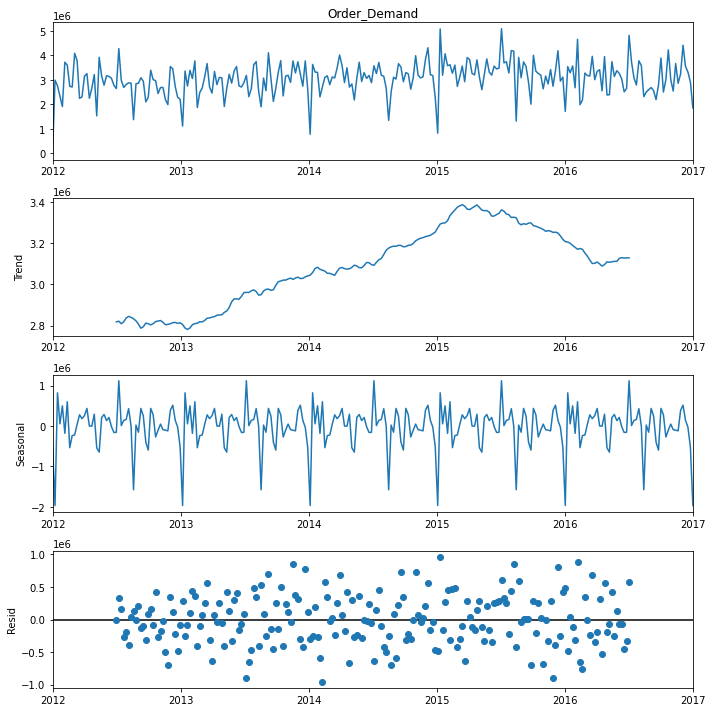

In [228]:
#Week Decomposition

decomposition = sm.tsa.seasonal_decompose(y_w, model = 'additive')
fig = decomposition.plot()
rcParams['figure.figsize'] = [10.0, 10.0]

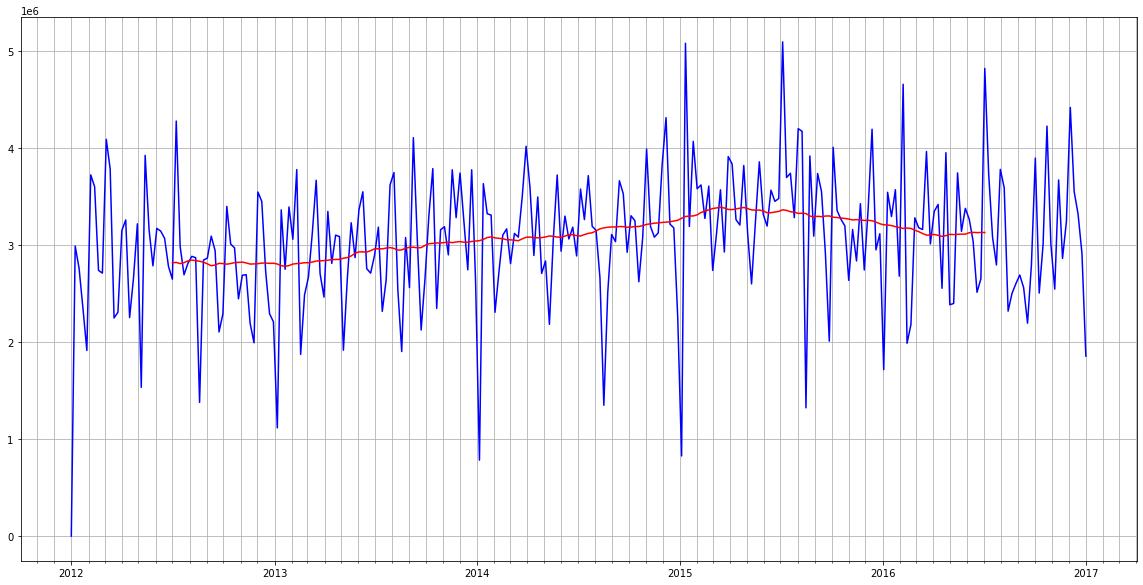

In [68]:
# Data + Trend (weekly)

rcParams['figure.figsize'] = [20, 10.0]
decomposition = sm.tsa.seasonal_decompose(y_w, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(y_w.index, y_w, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

### Monthly

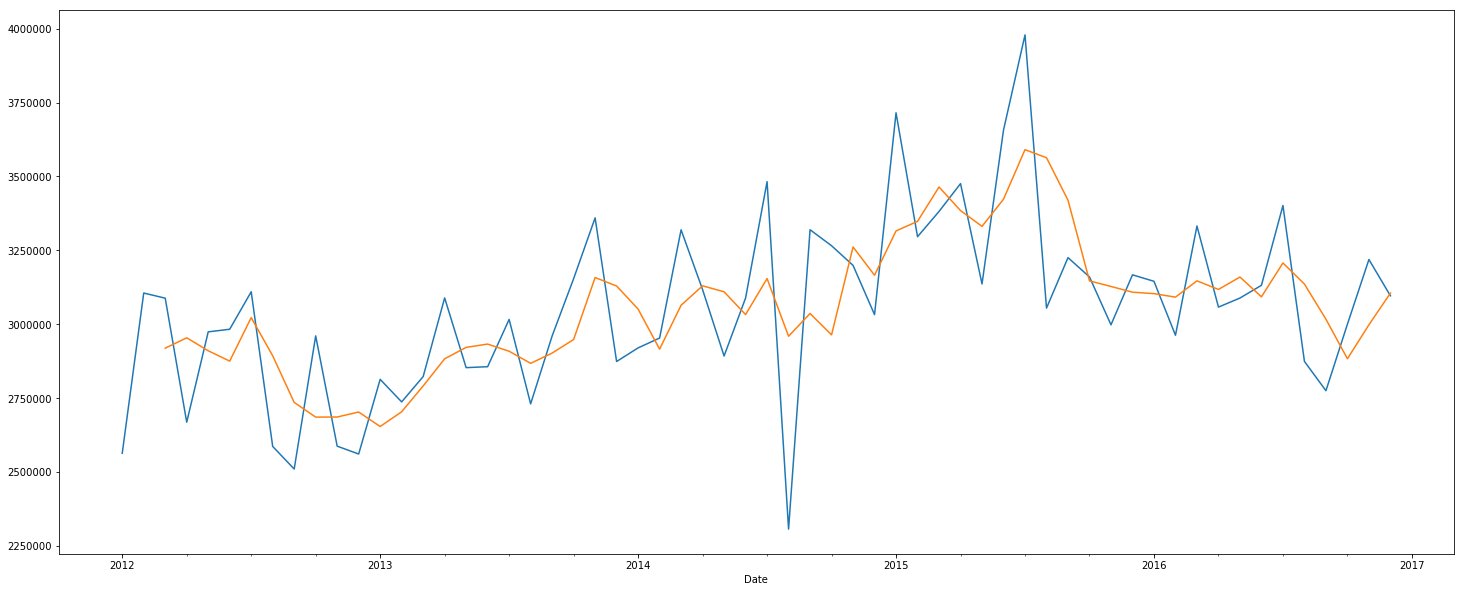

In [73]:
#Month Deconposition

y_m = df['Order_Demand'].resample('M').mean()

y_m.plot(figsize=(25,10))
y_m.rolling(window=3).mean().plot()
#y_m.rolling(window=6).mean().plot()

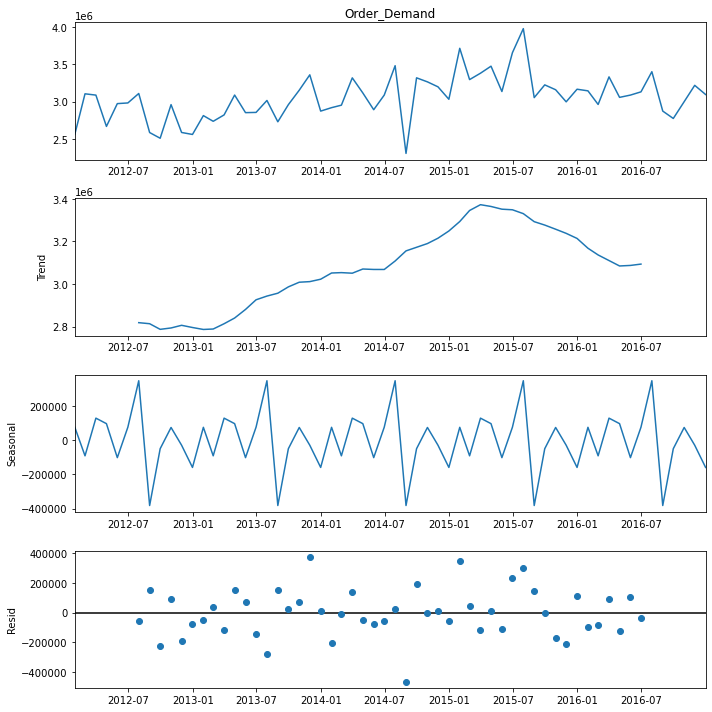

In [229]:
decomposition = sm.tsa.seasonal_decompose(y_m, model = 'additive')
fig = decomposition.plot()
rcParams['figure.figsize'] = [10.0, 10.0]

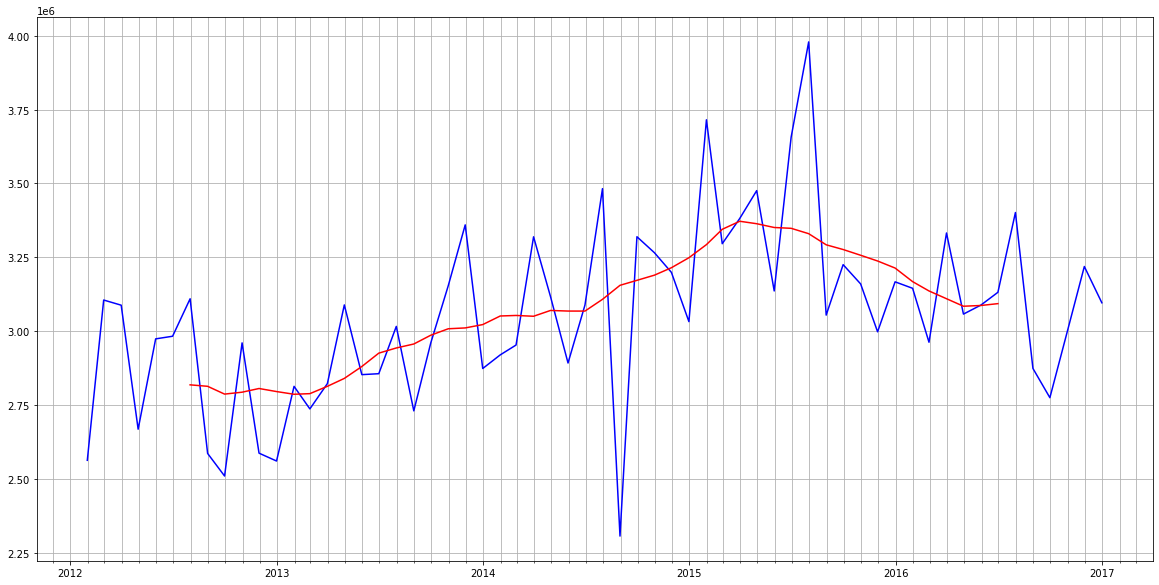

In [104]:
# Data + Trend (monthly)

rcParams['figure.figsize'] = [20, 10.0]
decomposition = sm.tsa.seasonal_decompose(y_m, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(y_m.index, y_m, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

## Moving Average x Exponential Smoothing

In [105]:
y_m1=pd.DataFrame(y_m).copy()
y_m1.dropna(inplace=True)
y_m1.index = pd.to_datetime(y_m.index)


In [108]:
y_m1['3_month_SMA'] = y_m1['Order_Demand'].rolling(window=3).mean()

In [109]:
y_m1['6_month_SMA'] = y_m1['Order_Demand'].rolling(window=6).mean()

In [112]:
y_m1['3_month_EWMA'] = y_m1['Order_Demand'].ewm(span=3).mean()

In [114]:
y_m1['6_month_EWMA'] = y_m1['Order_Demand'].ewm(span=6).mean()

In [84]:
#Exponentinal Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
span=12
alpha= 2/(span-1)




In [ ]:
y_m1['DES_add_12'] = ExponentialSmoothing(y_m1['Order_Demand'], trend='add').fit().fittedvalues

In [166]:
y_m1['DES_mult_12'] = ExponentialSmoothing(y_m1['Order_Demand'], trend='mul', ).fit().fittedvalues.shift(-1)

In [167]:
y_m1['TES_mul_12'] = ExponentialSmoothing(y_m1['Order_Demand'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

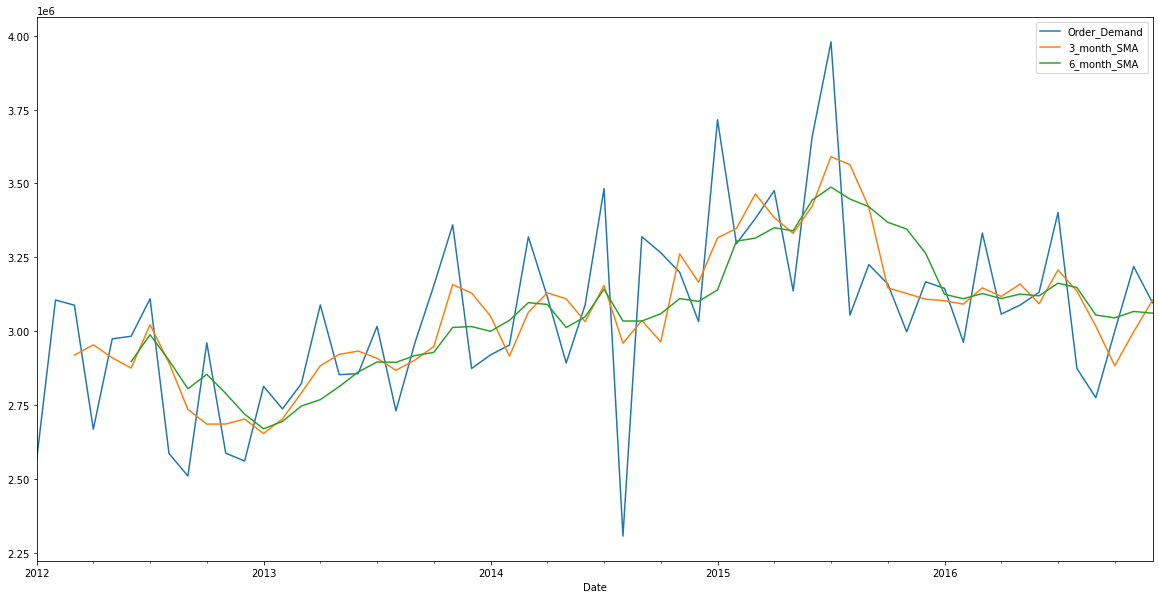

In [224]:
y_m1[["Order_Demand",'3_month_SMA', '6_month_SMA']].plot()

In [169]:
y_m1.columns

Index(['Order_Demand', '3_month_SMA', '6_month_SMA', '3_month_EWMA',
       '6_month_EWMA', 'DES_add_12', 'DES_mult_12', 'TES_mul_12'],
      dtype='object')

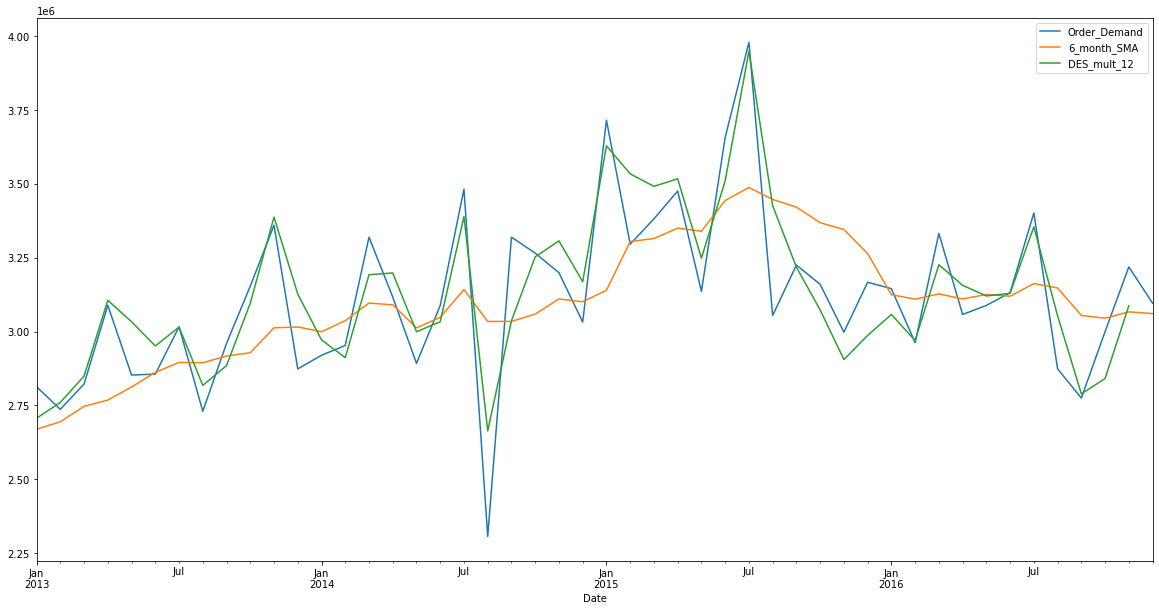

In [171]:
y_m1[["Order_Demand", "6_month_SMA", 'DES_mult_12']].iloc[12:].plot()

### Check Stationarity

The Time series data model works on stationary data. The stationarity of data is described by the following three criteria:-

1) It should have a constant mean

2) It should have a constant variance

3) Auto covariance does not depend on the time

*Mean – it is the average value of all the data

*Variance – it is a difference of each point value from the mean

*Auto covariance –it is a relationship between any two values at a certain amount of time.

#### Method to check the stationarity of the Time Series Data:-
There are two methods in python to check data stationarity:-

1) Rolling statistics:-

This method gave a visual representation of the data to define its stationarity. 
A Moving variance or moving average graph is plot and then it is observed whether it varies with time or not. 
In this method, a moving window of time is taken (based on our needs, for eg-10, 12, etc.) 
and then the mean of that time period is calculated as the current value.

2) Augmented Dickey- fuller Test (ADCF): –

In this method, we take a null hypothesis that the data is non-stationary. 
After executing this test, it will give some results comprised of test statistics 
and some other critical values that help to define the stationarity. 
If the test statistic is less than the critical value then we can reject the null hypothesis 
and say that the series is stationary.

In [185]:
#Test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput.to_string())
    
    if dftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

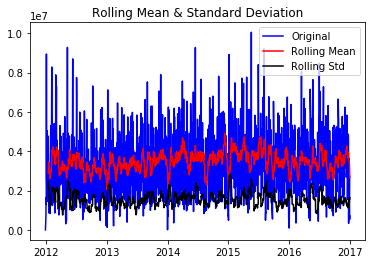

Results of Dickey-Fuller Test:
Test Statistic                   -6.73
p-value                           0.00
#Lags Used                       19.00
Number of Observations Used   1,286.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [187]:
#Test Y Daily
test_stationarity(y_d['Order_Demand'])

We can compare the ADF test statistic of -6.73 against the critical values. 
We see that the test statistic is more than all of the critical values, 
so we can reject the null hypothesis – in other words, 
the Order Demand is a stationary; we can't see trends, and its mean and variance do not changing.

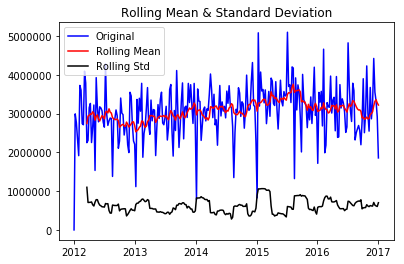

Results of Dickey-Fuller Test:
Test Statistic                -15.71
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   261.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [188]:
#Test Y Weekly
test_stationarity(y_w)

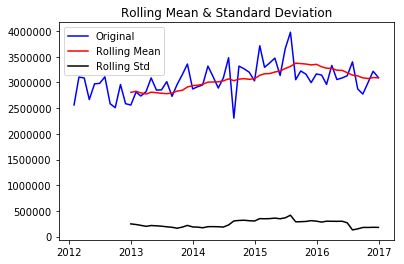

Results of Dickey-Fuller Test:
Test Statistic                -1.69
p-value                        0.44
#Lags Used                     3.00
Number of Observations Used   56.00
Critical Value (1%)           -3.55
Critical Value (5%)           -2.91
Critical Value (10%)          -2.60
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [190]:
#Test Y Monthly
test_stationarity(y_m['Order_Demand'])

## Autoregression

### Lag Plot

In [82]:
# Import necessary libraries
import datetime as dt
import os
import warnings
from collections import UserDict
from glob import glob
#from common.utils import load_data, mape
from IPython.display import Image
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")


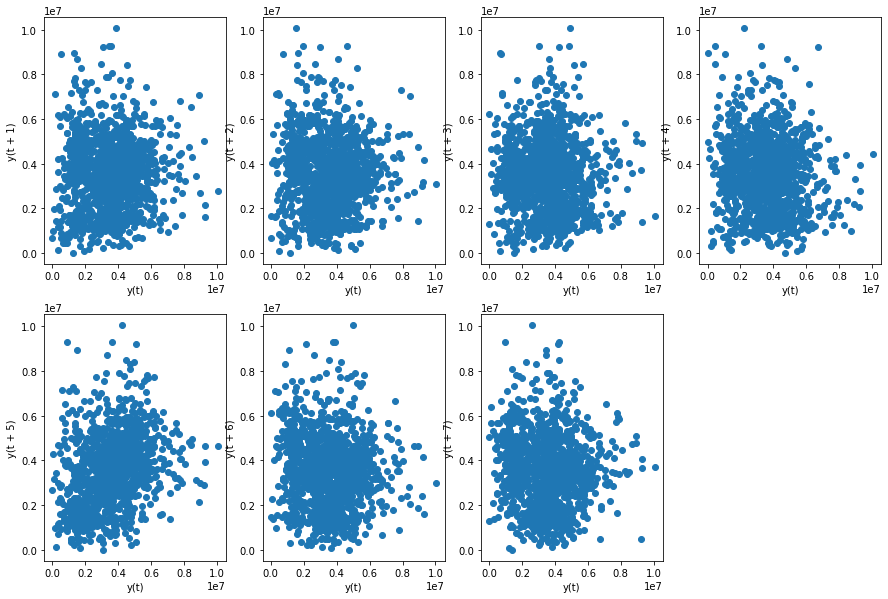

In [100]:
# Import lag_plot function
from pandas.plotting import lag_plot
plt.figure()
# Pass the lag argument and plot the values.
# When lag=1 the plot is essentially data[:-1] vs. data[1:]
# Plot our ts_data_load set

def lagplot(df, lag):

    for i in range(1,(lag + 1)):
        ax = plt.subplot(240 + i)
        lag_plot(df, lag=i)
    plt.show()

lagplot(y_d,7)

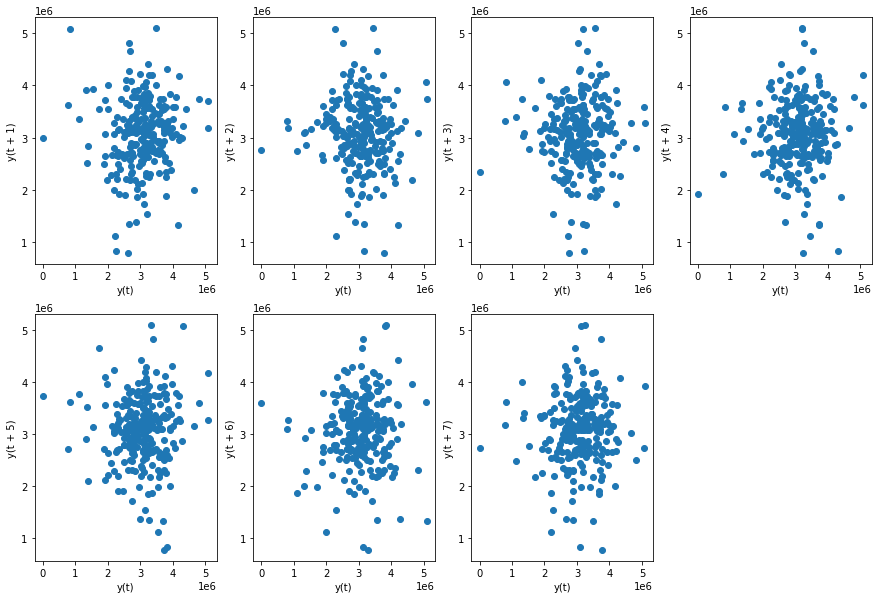

In [101]:
lagplot(y_w,7)

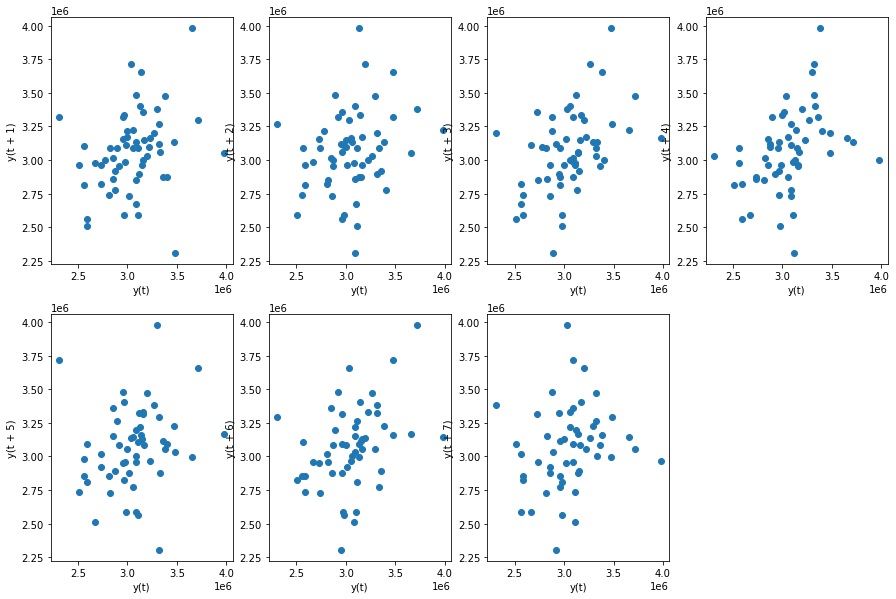

In [102]:
lagplot(y_m,7)

In [84]:
y_d.head()

Date
2011-12-30           2.00
2012-01-02     680,277.00
2012-01-03   1,645,257.00
2012-01-04   1,295,861.00
2012-01-05   8,941,774.00
Freq: B, Name: Order_Demand, dtype: float64

# Autocorrelation Plot

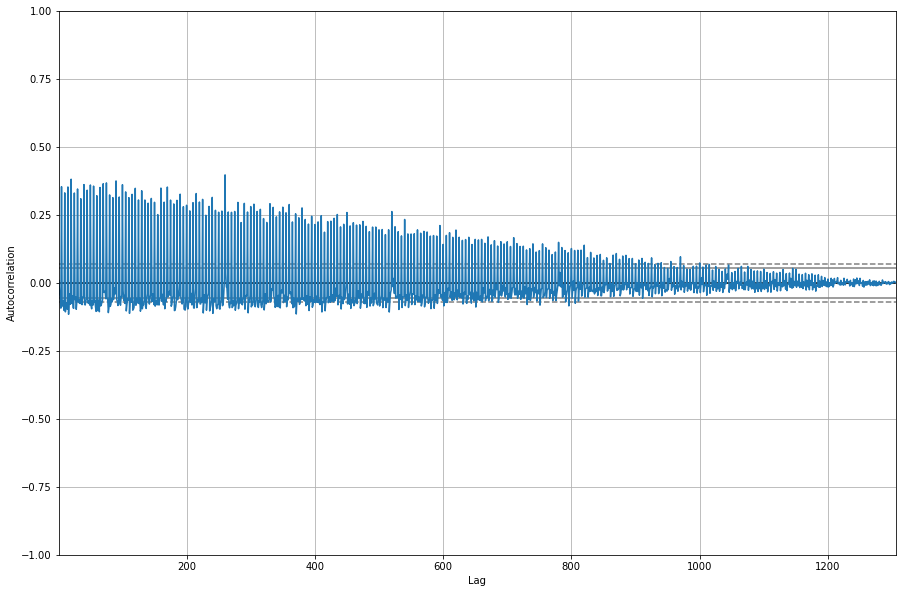

In [90]:
# Import autocorrelation_plot function
from pandas.plotting import autocorrelation_plot
plt.figure()

#Pass the autocorrelation argument and plot the values
autocorrelation_plot(y_d)

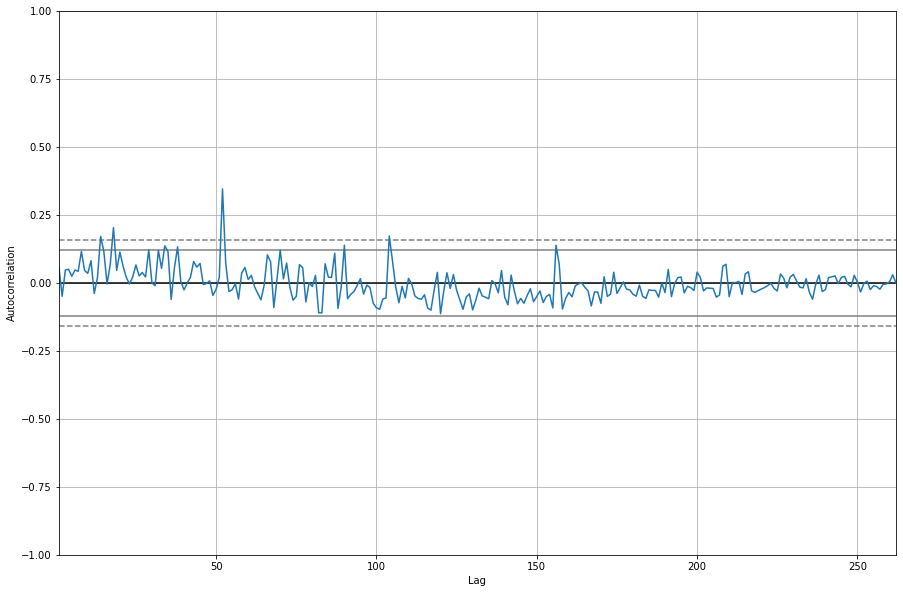

In [103]:
autocorrelation_plot(y_w)

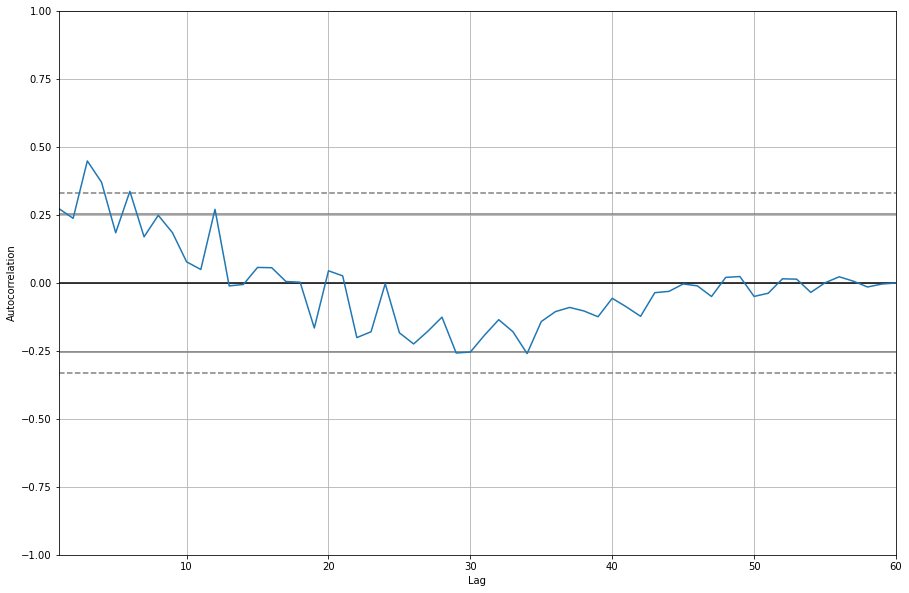

In [104]:
autocorrelation_plot(y_m)

## Autocorrelation Function (ACF) and Partial Autocorrelation Plot

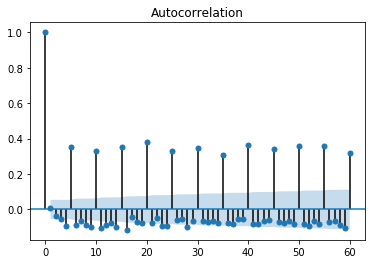

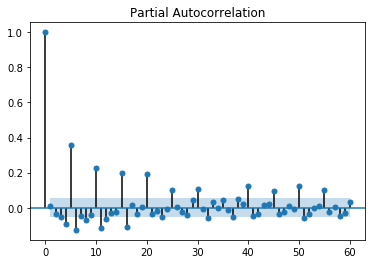

In [197]:
# Import  plot_acf() function
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the acf function on the ts_data_load set - daily
plot_acf(y_d['Order_Demand'], lags=60), plot_pacf(y_d['Order_Demand'],lags=60)
plt.show()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

    p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=5.
    q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=5.

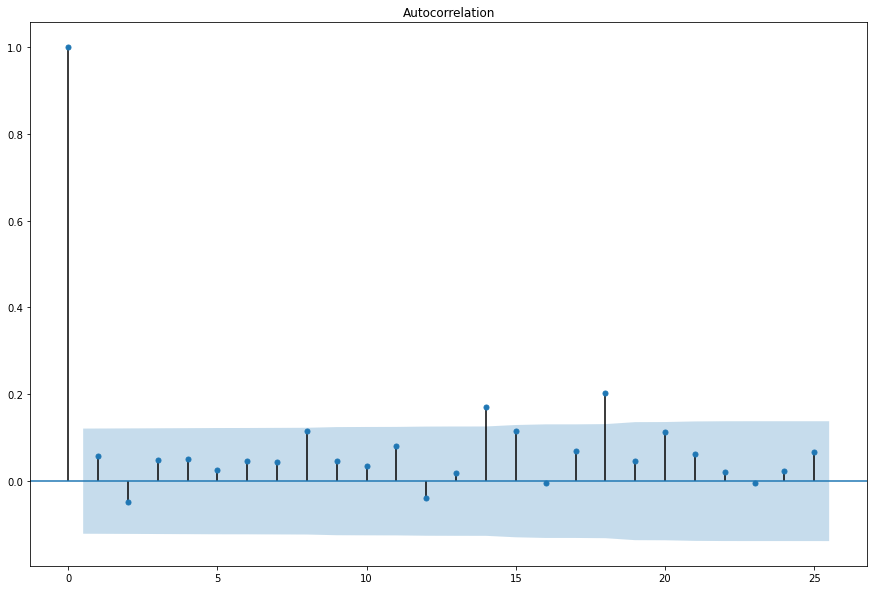

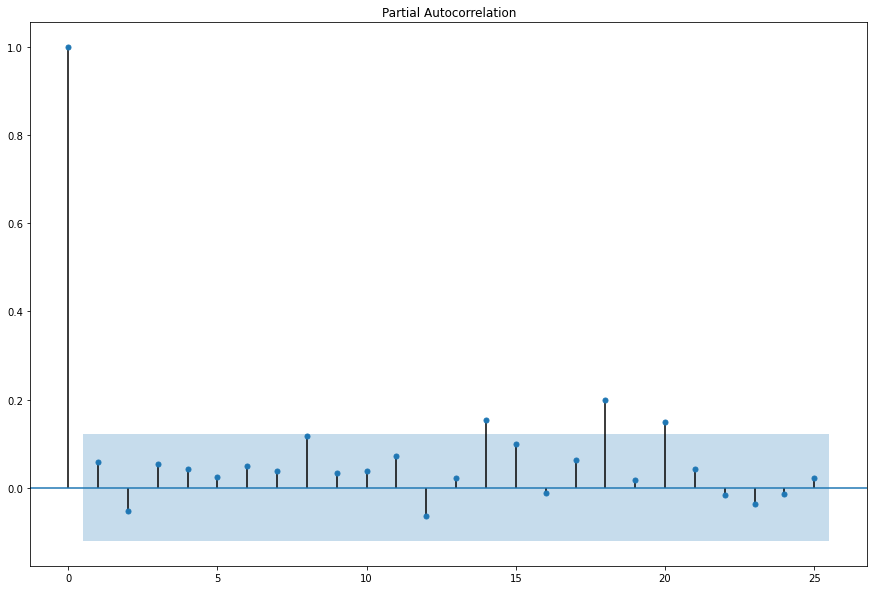

In [111]:
# Plot the acf and pacf function - weekly
plot_acf(y_w), plot_pacf(y_w)
plt.show()

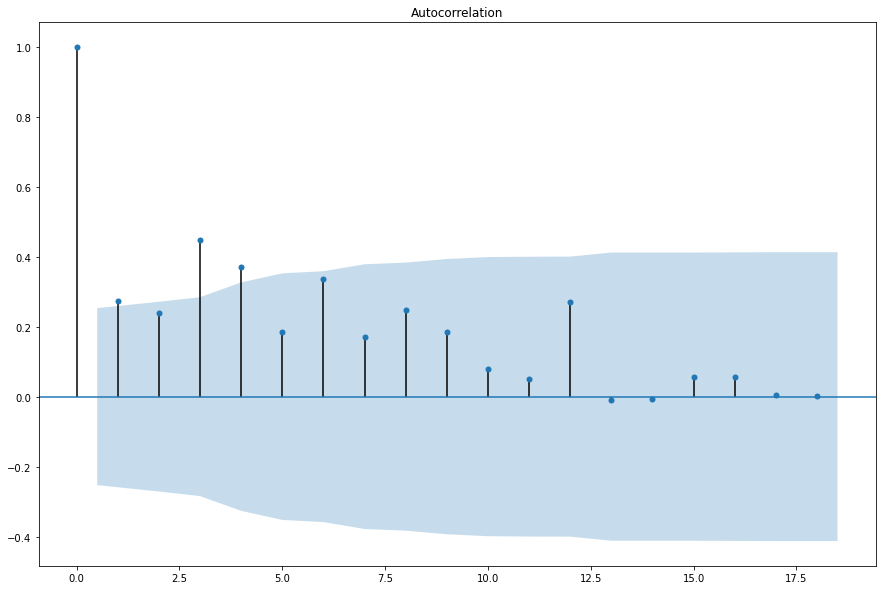

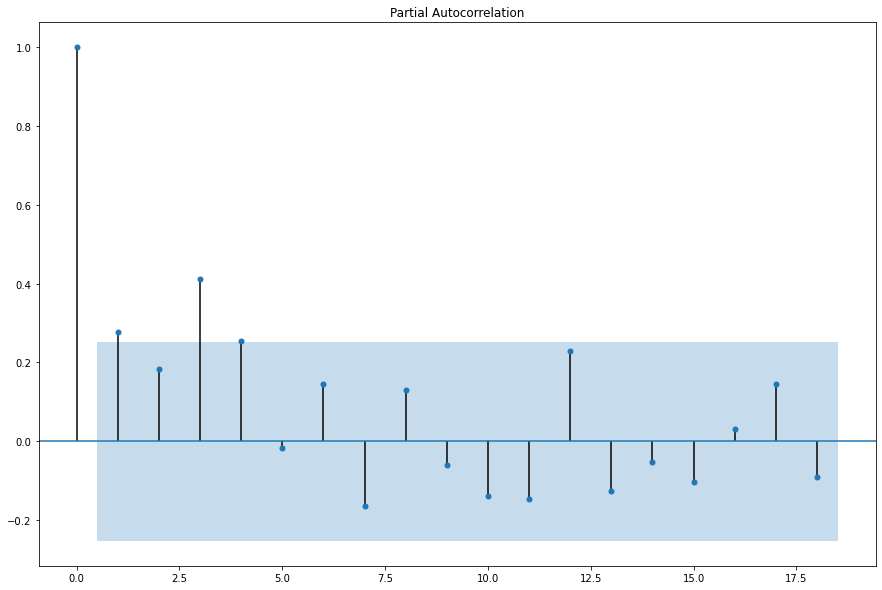

In [112]:
# Plot the acf and pacf function - monthly
plot_acf(y_m), plot_pacf(y_m)
plt.show()

The concepts and respective plots of ACF and PACF functions become particularly important when data scientists need to understand and determine the order of autoregressive and moving average time seires methods.


In [ ]:
ACF is an autocorrelation function that provides you with the information of how much a series is autocorrelated with its lagged values. 
In simple terms, is describes how well the present value of the series is related with its paste values. 
ACF consider all these components (trend, seasonality and cyclic patterns) while finding correlations

In [ ]:
PACF is another important function thet, instead of finding correlations of present values with lags like ACF, finds correlation of the residuals with the next lag. 
It is a function that measures the incremental benefit of adding another lag. 

### Forecasting a Time Series
We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.
Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

# Benchmarking: Exponential Smoothing Forecasting

### 1. Define the start date for the train and test sets

In [78]:
y_d_train_start_dt = '2012-01-01'
y_d_test_start_dt = '2016-01-01'

### 2. Create a train set containing only the model features

In [99]:
train = pd.DataFrame(y_d.copy())[
(y_d.index >= y_d_train_start_dt)
& (y_d.index < y_d_test_start_dt)][['Order_Demand']]
test = pd.DataFrame(y_d.copy())[y_d.index >= y_d_test_start_dt][['Order_Demand']]
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1044, 1)
Test data shape:  (261, 1)


### 3. Create the model

In [133]:
fitted_model = ExponentialSmoothing(train["Order_Demand"], 
                                    trend="add",
                                   seasonal='mul',
                                   seasonal_periods=210).fit()

### 4. Predict

In [134]:
test_predictions = fitted_model.forecast(261)

### 5. Compare the predictions and test Data

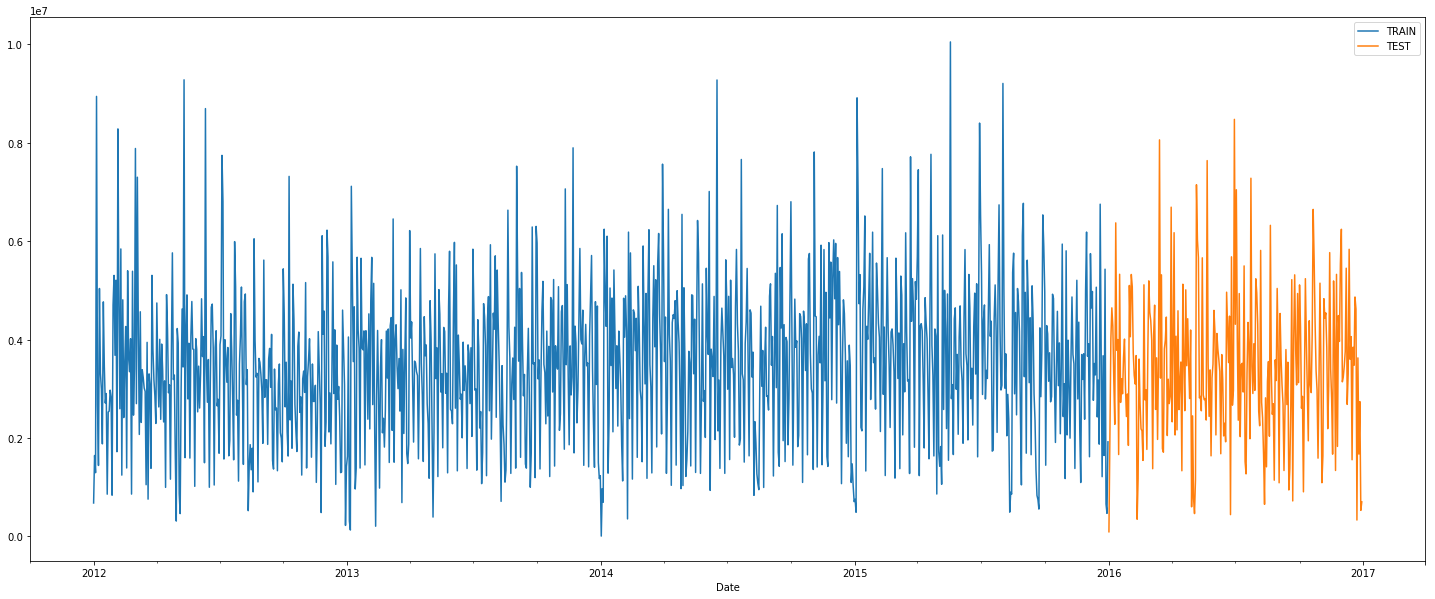

In [121]:
train['Order_Demand'].plot(legend=True, label='TRAIN', figsize=(25,10))
test['Order_Demand'].plot(legend=True, label='TEST')

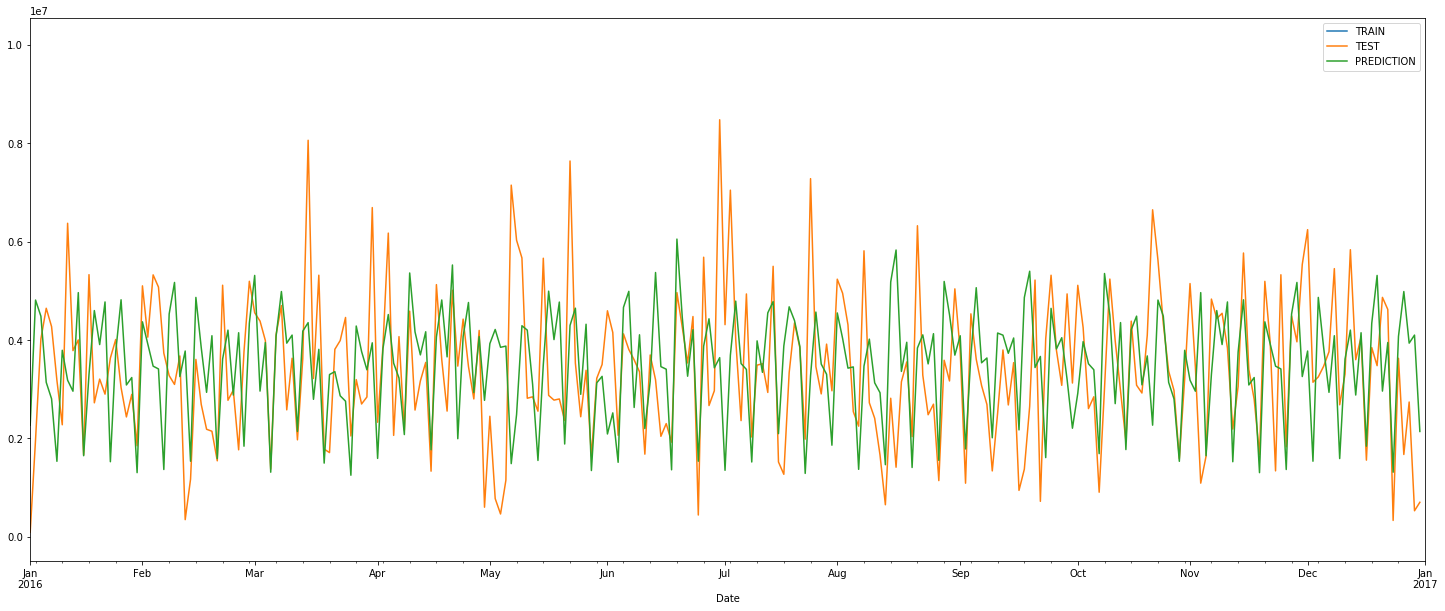

In [135]:
train['Order_Demand'].plot(legend=True, label='TRAIN', figsize=(25,10))
test['Order_Demand'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['2016-01-01', '2016-12-31'])

### 6. Evaluate the model

In [89]:
test.describe()

Order_Demand
count        261.00
mean   3,409,842.93
std    1,507,505.72
min       95,439.00
25%    2,450,518.00
50%    3,353,794.00
75%    4,309,470.00
max    8,474,968.00

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
#MAE
mean_absolute_error(test, test_predictions)

1203011.9544376568

In [92]:
#RMSE
np.sqrt(mean_squared_error(test, test_predictions))

1556089.4915840882

## Steps for ARIMA implementation
The general steps to implement an ARIMA model are –

    1. Load the data: The first step for model building is of course to load the dataset
    2. Preprocessing: Depending on the dataset, the steps of preprocessing will be defined. This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.
    3. Make series stationary: In order to satisfy the assumption, it is necessary to make the series stationary. This would include checking the stationarity of the series and performing required transformations
    4. Determine d value: For making the series stationary, the number of times the difference operation was performed will be taken as the d value
    5. Create ACF and PACF plots: This is the most important step in ARIMA implementation. ACF PACF plots are used to determine the input parameters for our ARIMA model
    6. Determine the p and q values: Read the values of p and q from the plots in the previous step
    7. Fit ARIMA model: Using the processed data and parameter values we calculated from the previous steps, fit the ARIMA model
    8. Predict values on validation set: Predict the future values
    9. Calculate RMSE: To check the performance of the model, check the RMSE value using the predictions and actual values on the validation set

In [136]:
# Import necessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import math
from pmdarima import auto_arima
#from common.utils import mape
#from python_utils import *
#from common import util

In [1]:
from pmdarima import auto_arima
#help(auto_arima)

In [145]:
stepwise_fit = auto_arima(y_d, start_p=0, start_q=0, max_p=6, max_q=6, seasonal=False, trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=41880.733, BIC=41891.081, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=41545.082, BIC=41560.604, Fit time=0.028 seconds
Fit ARIMA: order=(0, 1, 1); AIC=40992.462, BIC=41007.984, Fit time=0.357 seconds
Fit ARIMA: order=(1, 1, 1); AIC=40994.456, BIC=41015.152, Fit time=0.503 seconds
Fit ARIMA: order=(0, 1, 2); AIC=40994.456, BIC=41015.152, Fit time=0.590 seconds
Fit ARIMA: order=(1, 1, 2); AIC=40972.787, BIC=40998.657, Fit time=0.781 seconds
Fit ARIMA: order=(2, 1, 2); AIC=40966.085, BIC=40997.129, Fit time=1.186 seconds
Fit ARIMA: order=(2, 1, 1); AIC=40993.257, BIC=41019.126, Fit time=0.797 seconds
Fit ARIMA: order=(2, 1, 3); AIC=40756.444, BIC=40792.662, Fit time=1.529 seconds
Fit ARIMA: order=(3, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3); AIC=40966.742, BIC=40997.786, Fit time=1.124 seconds
Fit ARIMA: order=(3, 1, 3); AIC=40718.559, BIC=40759.951, Fit time=2.171 seconds
Fit ARIMA: order=(3, 1, 2); AIC=40965.115,

In [146]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1305
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -20326.438
Method:                       css-mle   S.D. of innovations        1402740.364
Date:                Wed, 16 Jun 2021   AIC                          40672.875
Time:                        15:59:37   BIC                          40724.615
Sample:                             1   HQIC                         40692.285
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        538.6543    557.575      0.966      0.334    -554.173    1631.481
ar.L1.D.y     -1.4243      0.030    -47.656      0.000      -1.483      -1.366
ar.L2.D.y     -0.8368      0.049    -17.225      0.000      -0.932      -0.742
ar.L3.D.y     -0.1507      0.054     -2.790      0.005      -0.257      -0.045
ar.L4.D.y     -0.3130      0.049     -6.423      0.000      -0.408      -0.217
ar.L5.D.y     -0.1006      0.029     -3.513      0.000      -0.157      -0.044
ma.L1.D.y      0.6102      0.016     38.178      0.000       0.579       0.641
ma.L2.D.y     -0.6018      0.009    -65.757      0.000      -0.620      -0.584
ma.L3.D.y     -0.9664      0.017    -56.344      0.000      -1.000      -0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8095           -0.5880j            1.0005           -0.4000
AR.2           -0.8095           +0.5880j            1.0005            0.4000
AR.3            0.8159           -1.5853j            1.7829           -0.1743
AR.4            0.8159           +1.5853j            1.7829            0.1743
AR.5           -3.1231           -0.0000j            3.1231           -0.5000
MA.1            1.0119           -0.0000j            1.0119           -0.0000
MA.2           -0.8173           -0.5955j            1.0113           -0.3998
MA.3           -0.8173           +0.5955j            1.0113            0.3998
-----------------------------------------------------------------------------
"""

In [147]:
stepwise_fit_s = auto_arima(y_d, start_p=0, start_q=0, max_p=6, max_q=6, seasonal=True, trace=True, m=5)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 1, 5); AIC=40578.086, BIC=40598.770, Fit time=1.329 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 5); AIC=41178.797, BIC=41189.139, Fit time=0.079 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 5); AIC=40844.970, BIC=40865.654, Fit time=0.354 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 5); AIC=40551.869, BIC=40572.553, Fit time=0.359 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 1, 5); AIC=40553.842, BIC=40579.696, Fit time=0.581 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 0, 5); AIC=41152.204, BIC=41167.717, Fit time=0.188 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 2, 5); AIC=40553.869, BIC=40579.723, Fit time=0.949 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 5); AIC=40548.120, BIC=40579.146, Fit time=2.802 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 5); AIC=40548.124, BIC=40584.320, Fit time=2.934 seconds
Fit ARIMA: order=(0

In [148]:
stepwise_fit_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1306
Model:             SARIMAX(1, 0, 3)x(1, 1, 2, 5)   Log Likelihood              -20261.657
Date:                           Wed, 16 Jun 2021   AIC                          40541.313
Time:                                   16:02:23   BIC                          40587.851
Sample:                                        0   HQIC                         40558.774
                                          - 1306                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3987.2064   1.54e+04     -0.259      0.795   -3.41e+04    2.62e+04
ar.L1         -0.9070      0.205     -4.429      0.000      -1.308      -0.506
ma.L1          1.0628      0.212      5.023      0.000       0.648       1.477
ma.L2          0.1986      0.078      2.542      0.011       0.045       0.352
ma.L3          0.0702      0.054      1.303      0.193      -0.035       0.176
ar.S.L5       -0.9907      0.020    -49.153      0.000      -1.030      -0.951
ma.S.L5        0.0228      0.037      0.625      0.532      -0.049       0.094
ma.S.L10      -0.9392      0.034    -27.434      0.000      -1.006      -0.872
sigma2      3.145e+12      0.000   1.03e+16      0.000    3.14e+12    3.14e+12
===================================================================================
Ljung-Box (Q):                       31.83   Jarque-Bera (JB):               279.35
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.45
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+31. Standard errors may be unstable.
"""

## FORECASTING WITH ARMA, ARIMA

In [151]:
#Import ARMA and ARIMA Libreries
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

## ARMA

In [217]:
from statsmodels.tsa.stattools import arma_order_select_ic


ModuleNotFoundError: No module named 'statsmodels.tools.eval_mesures'

In [150]:
#Considering the series is stationary

arma_order_select_ic(y_d)

{'bic':           0         1         2
 0 41,032.45 41,039.51 41,044.40
 1 41,039.52 41,046.49 41,023.57
 2 41,044.81 41,022.87       nan
 3 41,048.33 41,025.46 40,848.79
 4 41,043.75 40,965.14 40,753.88,
 'bic_min_order': (4, 2)}

### 1. Define the start date for the train and test sets

In [156]:
y_d_train_start_dt = '2012-01-01'
y_d_test_start_dt = '2016-01-01'

### 2. Create a train set containing only the model features

In [157]:
train = pd.DataFrame(y_d.copy())[
(y_d.index >= y_d_train_start_dt)
& (y_d.index < y_d_test_start_dt)][['Order_Demand']]
test = pd.DataFrame(y_d.copy())[y_d.index >= y_d_test_start_dt][['Order_Demand']]
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1044, 1)
Test data shape:  (261, 1)


In [161]:
model_ARMA = ARMA(train['Order_Demand'], order=(4,2))

In [162]:
results_ARMA = model_ARMA.fit()

In [163]:
results_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Order_Demand   No. Observations:                 1044
Model:                     ARMA(4, 2)   Log Likelihood              -16269.537
Method:                       css-mle   S.D. of innovations        1412597.319
Date:                Wed, 16 Jun 2021   AIC                          32555.074
Time:                        16:32:01   BIC                          32594.680
Sample:                    01-02-2012   HQIC                         32570.096
                         - 12-31-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.491e+06   4.55e+04     76.737      0.000     3.4e+06    3.58e+06
ar.L1.Order_Demand    -1.3979      0.000  -7797.139      0.000      -1.398      -1.398
ar.L2.Order_Demand    -0.8239      0.000  -4796.017      0.000      -0.824      -0.824
ar.L3.Order_Demand    -0.0707        nan        nan        nan         nan         nan
ar.L4.Order_Demand    -0.1797        nan        nan        nan         nan         nan
ma.L1.Order_Demand     1.6145        nan        nan        nan         nan         nan
ma.L2.Order_Demand     0.9976        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8089           -0.5879j            1.0000           -0.4000
AR.2           -0.8089           +0.5879j            1.0000            0.4000
AR.3            0.6120           -2.2785j            2.3593           -0.2082
AR.4            0.6120           +2.2785j            2.3593            0.2082
MA.1           -0.8092           -0.5896j            1.0012           -0.3998
MA.2           -0.8092           +0.5896j            1.0012            0.3998
-----------------------------------------------------------------------------
"""

In [165]:
start = len(train)
end= len(train) + len(test) - 1

In [214]:
predictions_ARMA = results_ARMA.predict(start, end).rename('ARMA (4,2) Predictions')

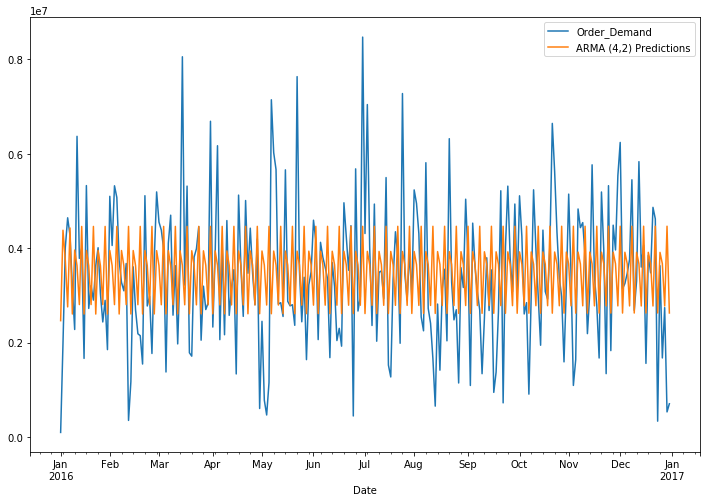

In [215]:
test['Order_Demand'].plot(figsize=(12,8), legend=True)
predictions_ARMA.plot(legend=True)

In [234]:
#from sklearn.metrics import mean_absolute_error
#MAE
mae_ARMA = mean_absolute_error(test['Order_Demand'], predictions_ARMA)
print(f'ARMA(4,2) MSE Error: {mae_ARMA:11.10}')

ARMA(4,2) MSE Error:  1088488.75


In [ ]:
from statsmodels.tools.eval_measures import rmse
rmse_ARMA = rmse(test['Order_Demand'], predictions_ARMA)
print(f'ARMA(4,2) RMSE Error: {rmse_ARMA:11.10}')

## ARIMA

In [155]:
auto_arima(y_d,seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1305
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -20326.438
Method:                       css-mle   S.D. of innovations        1402740.364
Date:                Wed, 16 Jun 2021   AIC                          40672.875
Time:                        16:23:47   BIC                          40724.615
Sample:                             1   HQIC                         40692.285
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        538.6543    557.575      0.966      0.334    -554.173    1631.481
ar.L1.D.y     -1.4243      0.030    -47.656      0.000      -1.483      -1.366
ar.L2.D.y     -0.8368      0.049    -17.225      0.000      -0.932      -0.742
ar.L3.D.y     -0.1507      0.054     -2.790      0.005      -0.257      -0.045
ar.L4.D.y     -0.3130      0.049     -6.423      0.000      -0.408      -0.217
ar.L5.D.y     -0.1006      0.029     -3.513      0.000      -0.157      -0.044
ma.L1.D.y      0.6102      0.016     38.178      0.000       0.579       0.641
ma.L2.D.y     -0.6018      0.009    -65.757      0.000      -0.620      -0.584
ma.L3.D.y     -0.9664      0.017    -56.344      0.000      -1.000      -0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8095           -0.5880j            1.0005           -0.4000
AR.2           -0.8095           +0.5880j            1.0005            0.4000
AR.3            0.8159           -1.5853j            1.7829           -0.1743
AR.4            0.8159           +1.5853j            1.7829            0.1743
AR.5           -3.1231           -0.0000j            3.1231           -0.5000
MA.1            1.0119           -0.0000j            1.0119           -0.0000
MA.2           -0.8173           -0.5955j            1.0113           -0.3998
MA.3           -0.8173           +0.5955j            1.0113            0.3998
-----------------------------------------------------------------------------
"""

This suggests that we should fit an ARIMA(5,1,3) model to best forecast future values of the series. Before we train the model, let's look at augmented Dickey-Fuller Test, and the ACF/PACF plots to see if they agree. These steps are optional, and we would likely skip them in practice.

In [173]:
from statsmodels.tsa.statespace.tools import diff

In [202]:
y_d['Diff_1'] = diff(y_d['Order_Demand'], k_diff=1)

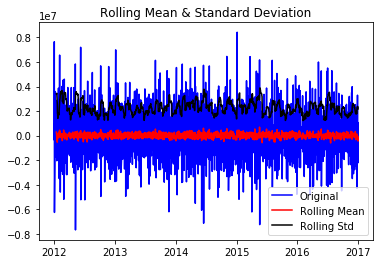

Results of Dickey-Fuller Test:
Test Statistic                  -13.30
p-value                           0.00
#Lags Used                       23.00
Number of Observations Used   1,281.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [203]:
test_stationarity(y_d['Diff_1'])

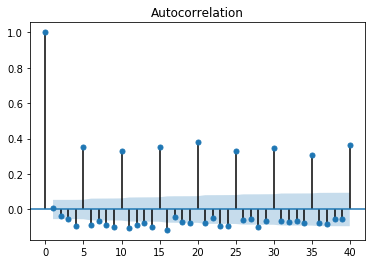

In [204]:
plot_acf(y_d['Order_Demand'], lags=40);

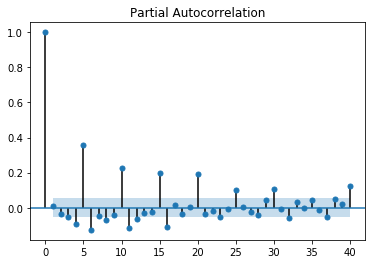

In [205]:
plot_pacf(y_d['Order_Demand'], lags=40);

This tells us that the AR component should be more important than MA. From the Duke University Statistical Forecasting site:

If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms.

Let's take a look at pmdarima.auto_arima done stepwise to see if having 𝑝 and 𝑞 terms the same still makes sense:

In [206]:
stepwise_fit = auto_arima(y_d['Order_Demand'], start_p=0, start_q=0,
                          max_p=6, max_q=6, m=7,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=41880.733, BIC=41891.081, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0); AIC=41545.082, BIC=41560.604, Fit time=0.088 seconds
Fit ARIMA: order=(0, 1, 1); AIC=40992.462, BIC=41007.984, Fit time=0.376 seconds
Fit ARIMA: order=(1, 1, 1); AIC=40994.456, BIC=41015.152, Fit time=0.473 seconds
Fit ARIMA: order=(0, 1, 2); AIC=40994.456, BIC=41015.152, Fit time=0.578 seconds
Fit ARIMA: order=(1, 1, 2); AIC=40972.787, BIC=40998.657, Fit time=0.793 seconds
Fit ARIMA: order=(2, 1, 2); AIC=40966.085, BIC=40997.129, Fit time=1.198 seconds
Fit ARIMA: order=(2, 1, 1); AIC=40993.257, BIC=41019.126, Fit time=0.921 seconds
Fit ARIMA: order=(2, 1, 3); AIC=40756.444, BIC=40792.662, Fit time=1.500 seconds
Fit ARIMA: order=(3, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3); AIC=40966.742, BIC=40997.786, Fit time=1.112 seconds
Fit ARIMA: order=(3, 1, 3); AIC=40718.559, BIC=40759.951, Fit time=2.097 seconds
Fit ARIMA: order=(3, 1, 2); AIC=40965.115,

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1305
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -20326.438
Method:                       css-mle   S.D. of innovations        1402740.364
Date:                Wed, 16 Jun 2021   AIC                          40672.875
Time:                        21:51:31   BIC                          40724.615
Sample:                             1   HQIC                         40692.285
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        538.6543    557.575      0.966      0.334    -554.173    1631.481
ar.L1.D.y     -1.4243      0.030    -47.656      0.000      -1.483      -1.366
ar.L2.D.y     -0.8368      0.049    -17.225      0.000      -0.932      -0.742
ar.L3.D.y     -0.1507      0.054     -2.790      0.005      -0.257      -0.045
ar.L4.D.y     -0.3130      0.049     -6.423      0.000      -0.408      -0.217
ar.L5.D.y     -0.1006      0.029     -3.513      0.000      -0.157      -0.044
ma.L1.D.y      0.6102      0.016     38.178      0.000       0.579       0.641
ma.L2.D.y     -0.6018      0.009    -65.757      0.000      -0.620      -0.584
ma.L3.D.y     -0.9664      0.017    -56.344      0.000      -1.000      -0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8095           -0.5880j            1.0005           -0.4000
AR.2           -0.8095           +0.5880j            1.0005            0.4000
AR.3            0.8159           -1.5853j            1.7829           -0.1743
AR.4            0.8159           +1.5853j            1.7829            0.1743
AR.5           -3.1231           -0.0000j            3.1231           -0.5000
MA.1            1.0119           -0.0000j            1.0119           -0.0000
MA.2           -0.8173           -0.5955j            1.0113           -0.3998
MA.3           -0.8173           +0.5955j            1.0113            0.3998
-----------------------------------------------------------------------------
"""

In [216]:
model_ARIMA = ARIMA(train['Order_Demand'], order=(5,1,3))
results_ARIMA = model_ARIMA.fit()
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Order_Demand   No. Observations:                 1043
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -16244.324
Method:                       css-mle   S.D. of innovations        1398092.566
Date:                Wed, 16 Jun 2021   AIC                          32508.648
Time:                        22:09:46   BIC                          32558.147
Sample:                    01-03-2012   HQIC                         32527.423
                         - 12-31-2015                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  172.6578    528.856      0.326      0.744    -863.880    1209.196
ar.L1.D.Order_Demand    -1.4396      0.001  -1397.593      0.000      -1.442      -1.438
ar.L2.D.Order_Demand    -0.8836      0.002   -586.131      0.000      -0.887      -0.881
ar.L3.D.Order_Demand    -0.2213        nan        nan        nan         nan         nan
ar.L4.D.Order_Demand    -0.3683        nan        nan        nan         nan         nan
ar.L5.D.Order_Demand    -0.1215      0.001    -92.237      0.000      -0.124      -0.119
ma.L1.D.Order_Demand     0.6230      0.004    156.195      0.000       0.615       0.631
ma.L2.D.Order_Demand    -0.6019      0.010    -59.475      0.000      -0.622      -0.582
ma.L3.D.Order_Demand    -0.9829        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8089           -0.5880j            1.0000           -0.4000
AR.2           -0.8089           +0.5880j            1.0000            0.4000
AR.3            0.7425           -1.5127j            1.6851           -0.1774
AR.4            0.7425           +1.5127j            1.6851            0.1774
AR.5           -2.8994           -0.0000j            2.8994           -0.5000
MA.1            1.0107           -0.0000j            1.0107           -0.0000
MA.2           -0.8116           -0.5899j            1.0033           -0.4000
MA.3           -0.8116           +0.5899j            1.0033            0.4000
-----------------------------------------------------------------------------
"""

In [229]:
start = len(train)
end = len(train) + len(test) - 1

predictions_ARIMA = results_ARIMA.predict(start=start, end=end, typ='levels').rename('ARIMA(5,1,3) Predictions')

In [230]:
predictions_ARIMA.head()

2016-01-01   3,038,758.08
2016-01-04   4,835,639.04
2016-01-05   4,128,398.86
2016-01-06   2,800,423.29
2016-01-07   4,352,729.69
Freq: B, Name: ARIMA(5,1,3) Predictions, dtype: float64

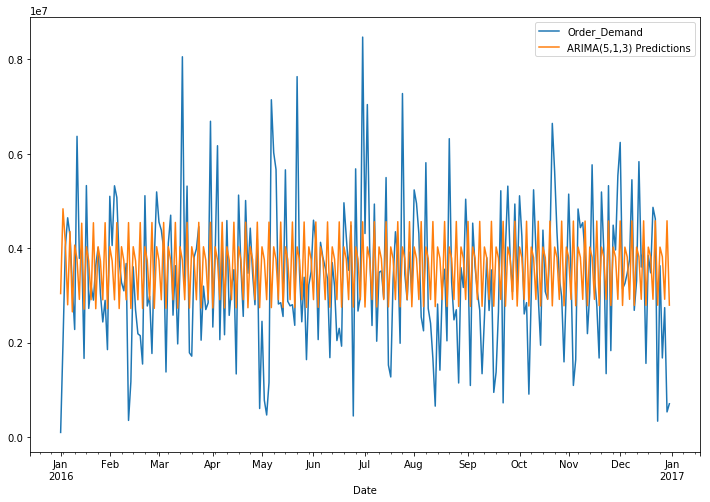

In [231]:
test['Order_Demand'].plot(legend=True, figsize=(12,8))
predictions_ARIMA.plot(legend=True)

In [237]:
#MAE
mae_ARIMA = mean_absolute_error(test['Order_Demand'], predictions_ARIMA)
print(f'ARIMA(5,1,3) MSE Error: {mae_ARIMA:11.10}')

ARIMA(5,1,3) MSE Error: 1109591.529


In [239]:
#RMSE
rmse_ARIMA = rmse(test['Order_Demand'], predictions_ARIMA)
print(f'ARIMA(5,1,3) RMSE Error: {rmse_ARIMA:11.10}')

ARIMA(5,1,3) RMSE Error:  1441626.91


## SARIMAX

In [241]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

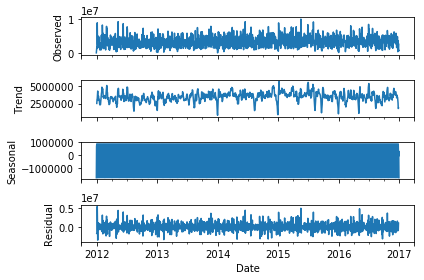

In [246]:
results_sarimax = seasonal_decompose(y_d['Order_Demand'], model='add')
results_sarimax.plot();

TypeError: 'AxesSubplot' object is not subscriptable

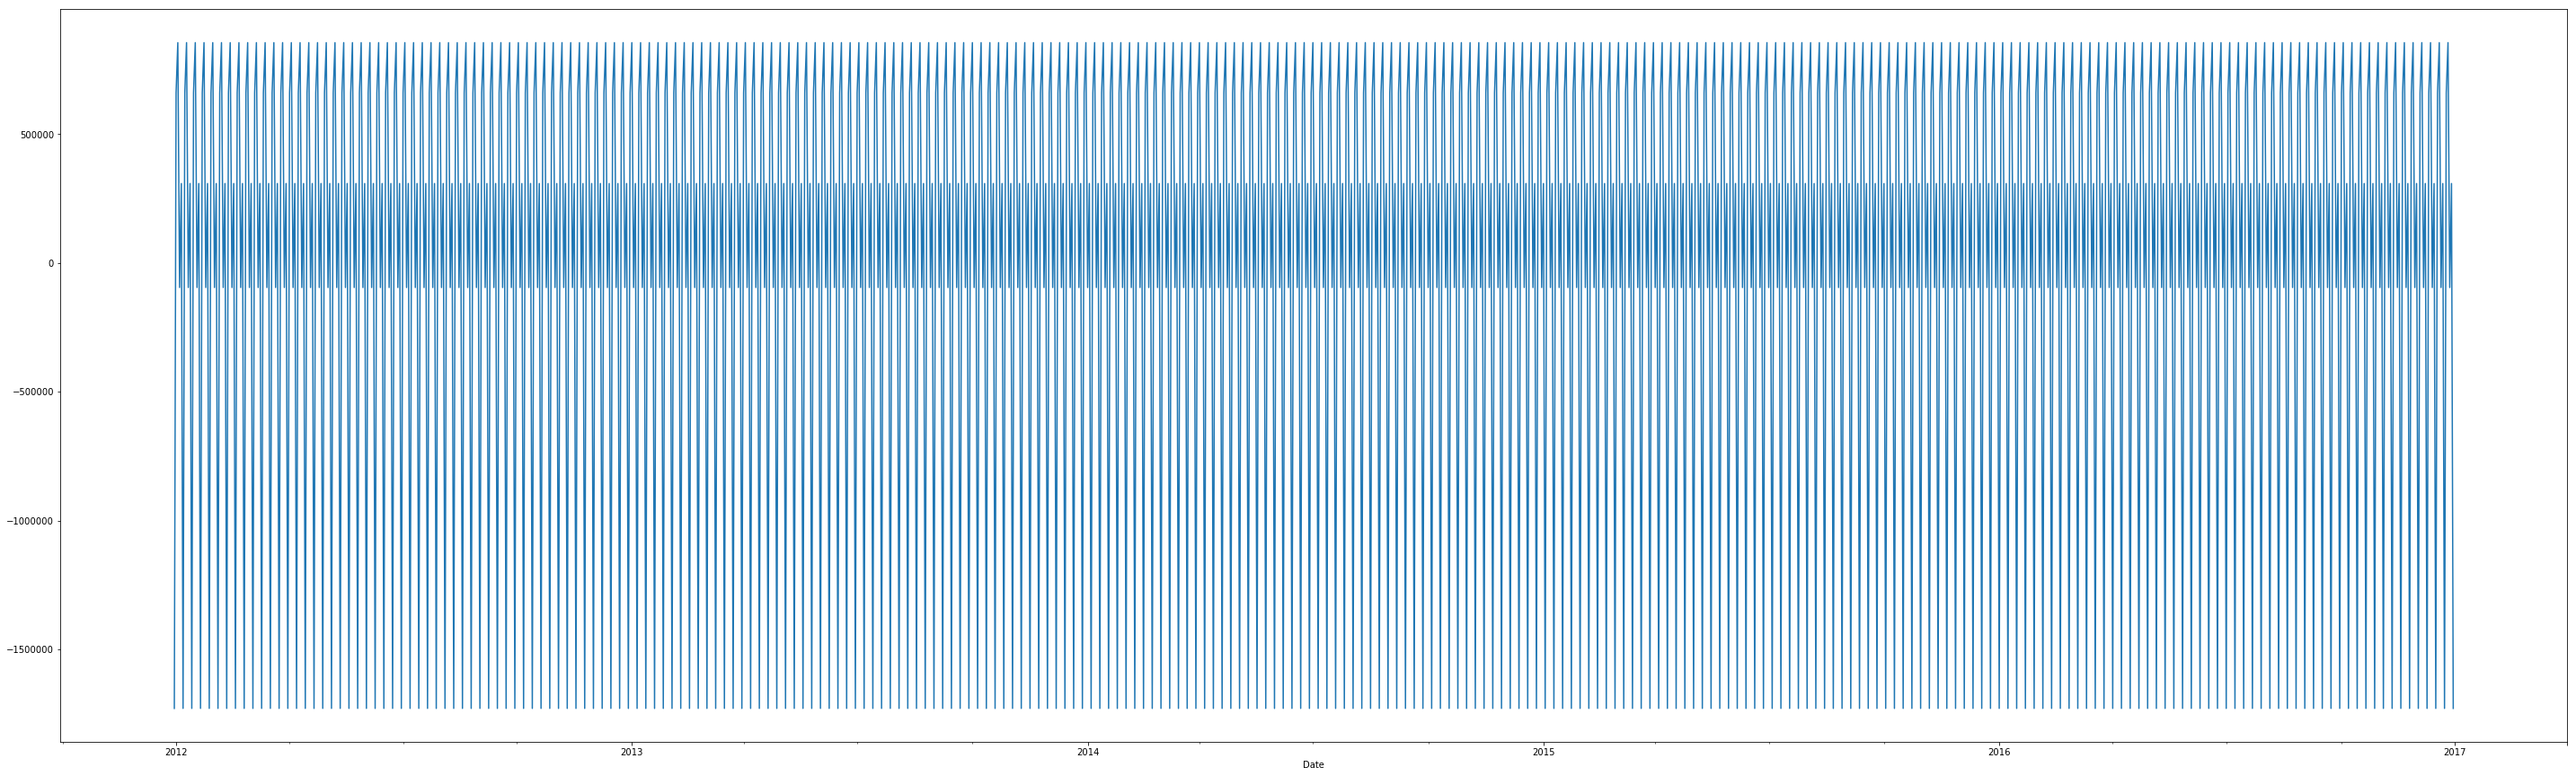

In [253]:
results_sarimax.seasonal.plot(figsize=(50,15))

In [254]:
auto_arima(y_d['Order_Demand'], seasonal=True, m=5).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1306
Model:             SARIMAX(1, 0, 3)x(1, 1, 2, 5)   Log Likelihood              -20261.657
Date:                           Wed, 16 Jun 2021   AIC                          40541.313
Time:                                   23:13:50   BIC                          40587.851
Sample:                                        0   HQIC                         40558.774
                                          - 1306                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3987.2064   1.54e+04     -0.259      0.795   -3.41e+04    2.62e+04
ar.L1         -0.9070      0.205     -4.429      0.000      -1.308      -0.506
ma.L1          1.0628      0.212      5.023      0.000       0.648       1.477
ma.L2          0.1986      0.078      2.542      0.011       0.045       0.352
ma.L3          0.0702      0.054      1.303      0.193      -0.035       0.176
ar.S.L5       -0.9907      0.020    -49.153      0.000      -1.030      -0.951
ma.S.L5        0.0228      0.037      0.625      0.532      -0.049       0.094
ma.S.L10      -0.9392      0.034    -27.434      0.000      -1.006      -0.872
sigma2      3.145e+12      0.000   1.03e+16      0.000    3.14e+12    3.14e+12
===================================================================================
Ljung-Box (Q):                       31.83   Jarque-Bera (JB):               279.35
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.45
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+31. Standard errors may be unstable.
"""

In [272]:
model_SARIMAX = SARIMAX(train['Order_Demand'], 
                        order=(1,0,3), 
                        seasonal_order=(1,1,2,10), 
                        enforce_invertibility=False)

In [273]:
results_SARIMAX = model_SARIMAX.fit()

In [274]:
results_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Order_Demand   No. Observations:                 1044
Model:             SARIMAX(1, 0, 3)x(1, 1, 2, 10)   Log Likelihood              -16105.295
Date:                            Thu, 17 Jun 2021   AIC                          32226.591
Time:                                    00:19:29   BIC                          32266.121
Sample:                                01-02-2012   HQIC                         32241.591
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8685      0.218      3.977      0.000       0.441       1.297
ma.L1         -0.7169      0.223     -3.222      0.001      -1.153      -0.281
ma.L2         -0.0577      0.080     -0.722      0.471      -0.214       0.099
ma.L3         -0.0082      0.075     -0.109      0.913      -0.156       0.139
ar.S.L10      -0.5714      0.617     -0.926      0.355      -1.781       0.638
ma.S.L10      -0.4246      0.649     -0.654      0.513      -1.697       0.848
ma.S.L20      -0.4893      0.616     -0.794      0.427      -1.697       0.718
sigma2      3.152e+12   5.13e-13   6.14e+24      0.000    3.15e+12    3.15e+12
===================================================================================
Ljung-Box (Q):                       27.26   Jarque-Bera (JB):               194.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.33
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.43e+40. Standard errors may be unstable.
"""

In [275]:
start = len(train)
end = len(train) + len(test) - 1

In [276]:
predictions_SARIMAX = results_SARIMAX.predict(start,end,typ='levels').rename('SARIMAX Predictions')

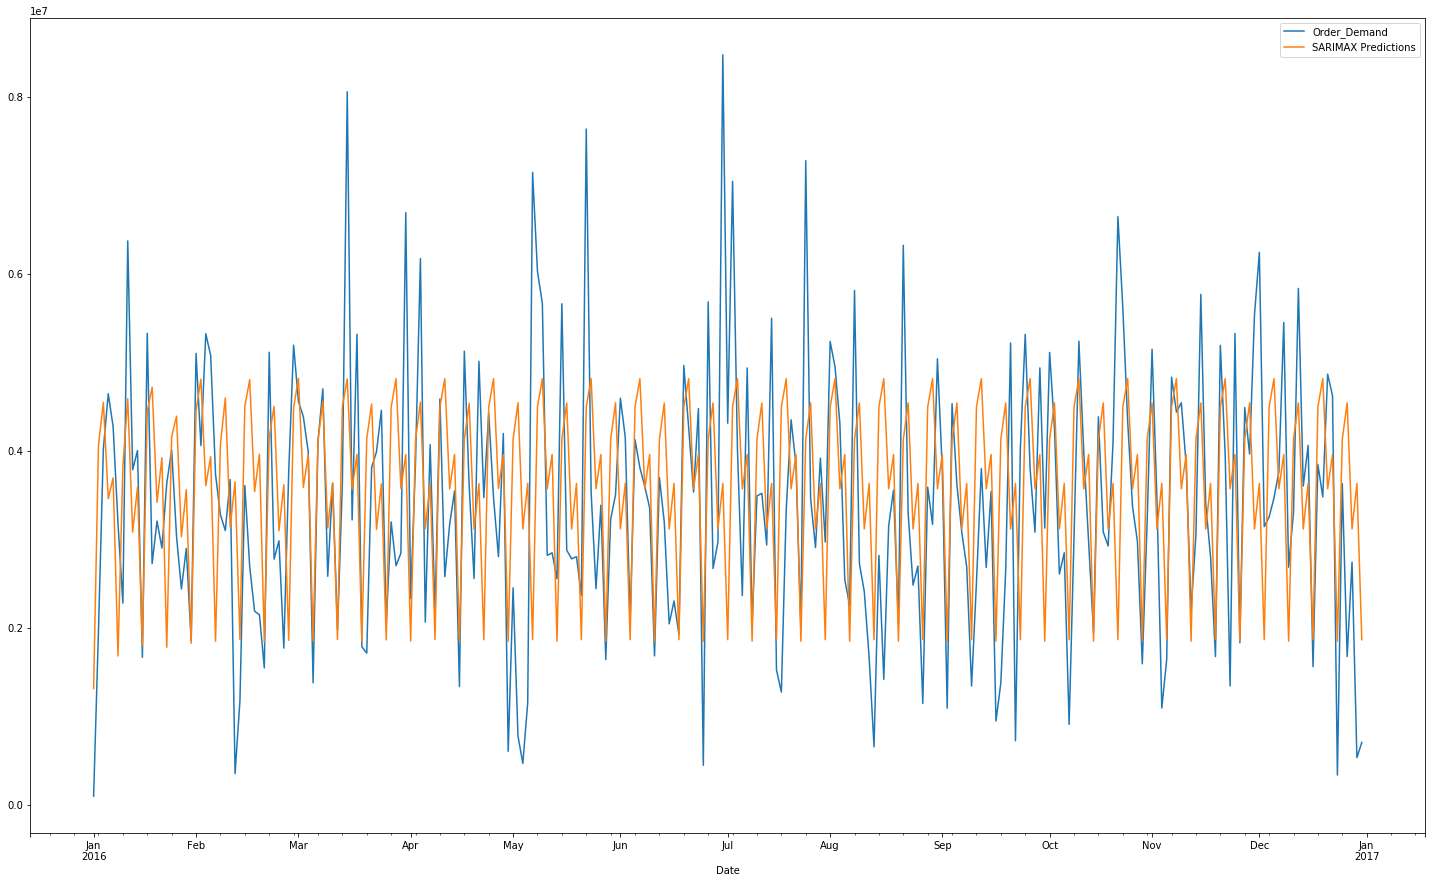

In [278]:
test['Order_Demand'].plot(legend=True, figsize=(25,15))
predictions_SARIMAX.plot(legend=True)

In [269]:
#MAE
mae_SARIMAX = mean_absolute_error(test['Order_Demand'], predictions_SARIMAX)
print(f'SARIMAX(1,0,3)x(1,1,2,10) MAE Error: {mae_SARIMAX:11.10}')

SARIMAX(1,0,3)x(1,1,2,10) MAE Error: 1057138.853


In [270]:
#RMSE
rmse_SARIMAX = rmse(test['Order_Demand'], predictions_SARIMAX)
print(f'SARIMAX(1,0,3)x(1,1,2,10) RMSE Error: {rmse_SARIMAX:11.10}')

SARIMAX(1,0,3)x(1,1,2,10) RMSE Error: 1376740.611


In [271]:
test['Order_Demand'].mean()

3409842.9348659003

In [ ]:
# 4. Data pre-processing and feature engineering